# Código de Extração e Análise de Submissões e Comentários do Reddit

## Parte I - Extração Usando API do Reddit

In [1]:
#PACOTES EXTRAÇÃO
import praw
import pandas as pd

### Arquivo credentials.py deve estar no diretório de trabalho com as devidas credenciais associadas
#### Cada usuário tem sua própria credencial, para saber mais acesse a __[Reddit API](https://www.reddit.com/dev/api)__

In [2]:
#CONEXÃO COM API DO REDDIT
import credentials as cred

reddit = praw.Reddit(client_id = cred.client_id,
                    client_secret = cred.client_secret,
#                    username = cred.username,
#                    password = cred.password,
                    user_agent = cred.user_agent)

In [3]:
#IMPORTA TABELA DE URLS PARA ANÁLISE
threads_list = pd.read_csv('reddit_threads.csv', sep=';')
threads_list.head()

,Name,Link,Subreddit
0,The End of Emuparadise (xpost from r/retrogaming),https://www.reddit.com/r/emulation/comments/95...,/emulation
1,Homebrew and Piracy ate not Synonyms,https://www.reddit.com/r/3DS/comments/3fm5mp/h...,/3DS
2,The End of Emupardise,https://www.reddit.com/r/retrogaming/comments/...,/retrogaming
3,Do emulator players really use their emulators...,https://www.reddit.com/r/emulation/comments/4i...,/emulation
4,With emulating zelda BOTW being the top post o...,https://www.reddit.com/r/pcgaming/comments/5xv...,/pcgaming


In [4]:
#CRIA DATAFRAMES DE COMENTÁRIOS E SUBMISSÕES
submissions_df = pd.DataFrame(columns=['id_sub', 'selftext','author','created_utc','comments','score','subreddit','title'])
comments_df = pd.DataFrame(columns=['id_sub', 'id_comm', 'body','author','created_utc','replies','score','tree_order'])

In [5]:
#CRIA DATAFRAME BASE DE SUBMISSÕES
i=0

for row_index,row in threads_list.iterrows():
    url = threads_list.loc[row_index,'Link']
    submission = reddit.submission(url=url)
    
    submissions_df.loc[i] = [submission.id, submission.selftext, submission.author, submission.created_utc,
                             submission.comments, submission.score, submission.subreddit, submission.title]
    i = i +1
    
submissions_df

,id_sub,selftext,author,created_utc,comments,score,subreddit,title
0,95mcku,I won't be linking the Site because I not sure...,Vietname,1.533738e+09,"(e3ugdsv, e3u0qv8, e3tz4ir, e3u2ypz, e3uc1zr, ...",1016,emulation,The End of Emuparadise (xpost from r/retrogaming)
1,3fm5mp,There seems to be a lot of people on this subr...,Yhdiste,1.438607e+09,"(ctpuqlo, ctpwg0m, ctpvvfv, ctq13eo, ctq6m8n, ...",601,3DS,Homebrew and Piracy are not synonyms
2,95l6p0,I won't be linking the Site because I not sure...,DaveTheMan1985,1.533728e+09,"(e3u05ws, e3tlhph, e3tj8uv, e3tiuzw, e3tzkf4, ...",371,retrogaming,The End of Emupardise
3,4ibsl4,I have dumped a few ROMs from my old N64 and G...,IamCarbonMan,1.462656e+09,"(d2wv1z4, d2xf4ha, d2wtzcc, d2wyh6k, d2x1nhs, ...",257,emulation,Do emulator players really use their emulators...
4,5xvi2q,Personally i understand both sides of the emul...,Dmilioni,1.488830e+09,"(del5q4r, delbmtq, del7lbq, del5k0t, del68z5, ...",25,pcgaming,With emulating zelda BOTW being the top post o...
5,9bjv18,I really like that you can play old games with...,J-21,1.535638e+09,"(e53im9s, e53jfhi, e53itdy, e53ho80, e53rg2s, ...",0,emulation,I don't really like the Emulation of current G...
6,2pmgzm,firstly I'd like to say if you are even remote...,Minuteworld94,1.418857e+09,"(cmy5sti, cmy13cg, cmy989d, cmyali5, cmy6akc, ...",321,pcmasterrace,let's talk about emulation and what programs y...
7,5vzk1i,I get it. I really do. We want full control of...,Dacvak,1.487965e+09,"(de63tad, de645xa, de66b4g, de64uue, de673yo, ...",18,NintendoSwitch,I truly hope the Switch never gets hacked.
8,4uznwc,High risk post since the Cemu thread was locke...,BlinksTale,1.469694e+09,"(d5u8yo9, d5u92y1, d5ujsa2, d5vgiqt, d5utn5f, ...",2,emulation,Is it legal to make a profit from selling an e...
9,8i8ylu,I would like to download roms ( yes I know tha...,OkProduce8,1.525896e+09,"(dyqf821, dyqm5l8, dys773s, dyqgni6, dys84fc, ...",0,emulation,I want to emulate games but I don´t know if it...


In [6]:
#EXTRAI COMENTÁRIOS COMPLETOS PARA CADA SUBMISSÃO E SALVA EM DATAFRAME DE COMENTARIOS
from praw.models import MoreComments

l=0

for index, row in submissions_df.iterrows():
    
    id_sub = row['id_sub']
    submission = reddit.submission(id=id_sub)
    submission.comments.replace_more(limit=None, threshold=0)

    for comment in submission.comments.list():

        comments_df.loc[l] = [submission.id, comment.id, comment.body,
                         comment.author, comment.created_utc, 
                         comment.replies, comment.score, '0']

        l = l + 1

comments_df

,id_sub,id_comm,body,author,created_utc,replies,score,tree_order
0,95mcku,e3ugdsv,"Given that, in light of this, it's no longer a...",LocutusOfBorges,1.533759e+09,(e3wn5u9),1,0
1,95mcku,e3u0qv8,RIP My favorite ROM site. Time to get a hardri...,Abwezi,1.533747e+09,"(e3udiq4, e3vh1w2, e3vug7p, e45ajsx)",347,0
2,95mcku,e3tz4ir,Feels like part of my life is gone,mr_dfuse2,1.533745e+09,(),159,0
3,95mcku,e3u2ypz,I wish there was some sort of law or rule that...,None,1.533748e+09,"(e3uo7si, e3vh1dq, e3vk1oy, e3vmph6, e3uxlri, ...",138,0
4,95mcku,e3uc1zr,"Sigh. Thanks, Nintendo.",Ploddit,1.533756e+09,(e3vj902),88,0
...,...,...,...,...,...,...,...,...
3357,fz7w09,fn47hde,I was able to clip out by jumping into the cor...,scarper42,1.586636e+09,(fn4bih4),15,0
3358,fz7w09,fn42an6,"I didn't have the bomb bag yet,send help.",a0supertramp,1.586633e+09,(),6,0
3359,fz7w09,fn41tyu,They are pretty damn close though. I don't mi...,damageinc86,1.586632e+09,(fn7yw9a),5,0
3360,fz7w09,fn4bih4,The World Record History of Secret Bonus Priso...,MuskyMusk123,1.586638e+09,(),9,0


In [7]:
#SALVA DATAFRAMES EM CSV
comments_df.to_csv(path_or_buf='comments_df_f.csv', sep=',')
submissions_df.to_csv(path_or_buf='submissions_df.csv', sep=',')

## Parte II - Limpeza e Preparação das Bases
### Comentários

In [8]:
#CARREGA ARQUIVO CSV SALVO PREVIAMENTE
import pandas as pd

comments_df_f2 = pd.read_csv('comments_df_f.csv', sep=',')
comments_df_f2.head()

,Unnamed: 0,id_sub,id_comm,body,author,created_utc,replies,score,tree_order
0,0,95mcku,e3ugdsv,"Given that, in light of this, it's no longer a...",LocutusOfBorges,1.533759e+09,<praw.models.comment_forest.CommentForest obje...,1,0
1,1,95mcku,e3u0qv8,RIP My favorite ROM site. Time to get a hardri...,Abwezi,1.533747e+09,<praw.models.comment_forest.CommentForest obje...,347,0
2,2,95mcku,e3tz4ir,Feels like part of my life is gone,mr_dfuse2,1.533745e+09,<praw.models.comment_forest.CommentForest obje...,159,0
3,3,95mcku,e3u2ypz,I wish there was some sort of law or rule that...,NaN,1.533748e+09,<praw.models.comment_forest.CommentForest obje...,138,0
4,4,95mcku,e3uc1zr,"Sigh. Thanks, Nintendo.",Ploddit,1.533756e+09,<praw.models.comment_forest.CommentForest obje...,88,0


In [9]:
#LIMPRA CARACTÉRES INDESEJADOS, CITAÇÕES, CÓDIGOS DO REDDIT E OUTROS
import re
import string

comments_df_clean_1 = pd.DataFrame(columns=['id_sub', 'id_comm', 'body','author','created_utc','replies','score','tree_order'])

for row_index,row in comments_df_f2.iterrows():
    text = str(comments_df_f2['body'][row_index])
    split_text = text.splitlines()
    text2 = ''

    for index in split_text:
        if not index.startswith('>'):
            text2 += str(index)
    
    text2 = text2.lower()
    text2 = re.sub('\[.*?\]', '', text2)
    text2 = re.sub('\[.*?\]', '', text2)
    text2 = re.sub('[%s]' % re.escape(string.punctuation), '', text2)
    text2 = re.sub('\w*\d\w*', '', text2)
    text2 = re.sub('[‘’“”…]', '', text2)
    text2 = re.sub('\n', '', text2)
    
#    test_df2.loc[row_index]['body'] = text2
    comments_df_clean_1.loc[row_index] = [comments_df_f2['id_sub'][row_index], 
                               comments_df_f2['id_comm'][row_index], text2, 
                               comments_df_f2['author'][row_index], comments_df_f2['created_utc'][row_index], 
                               comments_df_f2['replies'][row_index], comments_df_f2['score'][row_index],
                               comments_df_f2['tree_order'][row_index]]
    
comments_df_clean_1.head()

,id_sub,id_comm,body,author,created_utc,replies,score,tree_order
0,95mcku,e3ugdsv,given that in light of this its no longer a ro...,LocutusOfBorges,1.533759e+09,<praw.models.comment_forest.CommentForest obje...,1,0
1,95mcku,e3u0qv8,rip my favorite rom site time to get a hardriv...,Abwezi,1.533747e+09,<praw.models.comment_forest.CommentForest obje...,347,0
2,95mcku,e3tz4ir,feels like part of my life is gone,mr_dfuse2,1.533745e+09,<praw.models.comment_forest.CommentForest obje...,159,0
3,95mcku,e3u2ypz,i wish there was some sort of law or rule that...,NaN,1.533748e+09,<praw.models.comment_forest.CommentForest obje...,138,0
4,95mcku,e3uc1zr,sigh thanks nintendo,Ploddit,1.533756e+09,<praw.models.comment_forest.CommentForest obje...,88,0


In [10]:
#TOKENIZA TEXTOS, RETIRA PALAVRAS DE TRANSIÇÃO E LEMMANIZA PALAVRAS
import nltk
from nltk import word_tokenize
from nltk.corpus import wordnet as wn

def get_lemma(word):
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
        return lemma
    
tokenized_list_of_sentences = []
list_of_sentences = []

comments_df_clean_1['body'] = comments_df_clean_1['body'].astype(str)
comments_df_clean_2 = pd.DataFrame(columns=['id_sub', 'id_comm','score','tree_order','body','tk_body'])
en_stop = set(nltk.corpus.stopwords.words('english'))

for row_index,row in comments_df_clean_1.iterrows():
    raw = comments_df_clean_1['body'][row_index]
    tokens = nltk.word_tokenize(raw)
    tokens = [token for token in tokens if token not in en_stop]
    tokens = [get_lemma(token) for token in tokens]
    tokens = [token for token in tokens if not token.startswith("linkedhttp")]
    tokens = [token for token in tokens if not token == 'nan']
    
    tokenized_list_of_sentences.append(tokens)
    list_of_sentences.append(raw)
    
    comments_df_clean_2.loc[row_index] = [comments_df_clean_1['id_sub'][row_index], 
                        comments_df_clean_1['id_comm'][row_index],
                        comments_df_clean_1['score'][row_index],
                        comments_df_clean_1['tree_order'][row_index],
                        comments_df_clean_1['body'][row_index],
                        tokens]
    
comments_df_clean_2.head()

,id_sub,id_comm,score,tree_order,body,tk_body
0,95mcku,e3ugdsv,1,0,given that in light of this its no longer a ro...,"[given, light, longer, rom, site, long, major,..."
1,95mcku,e3u0qv8,347,0,rip my favorite rom site time to get a hardriv...,"[rip, favorite, rom, site, time, get, hardrive..."
2,95mcku,e3tz4ir,159,0,feels like part of my life is gone,"[feel, like, part, life, go]"
3,95mcku,e3u2ypz,138,0,i wish there was some sort of law or rule that...,"[wish, sort, law, rule, would, allow, video, g..."
4,95mcku,e3uc1zr,88,0,sigh thanks nintendo,"[sigh, thanks, nintendo]"


In [11]:
#SALVA BASE LIMPA EM CSV
comments_df_clean_2.to_csv(path_or_buf='comments_df_clean.csv', sep=';', index=False)

### Submissões

In [12]:
#CARREGA ARQUIVO CSV SALVO PREVIAMENTE
submissions_df = pd.read_csv('submissions_df.csv', sep=',', usecols=range(1,9))
submissions_df.head()

,id_sub,selftext,author,created_utc,comments,score,subreddit,title
0,95mcku,I won't be linking the Site because I not sure...,Vietname,1.533738e+09,<praw.models.comment_forest.CommentForest obje...,1016,emulation,The End of Emuparadise (xpost from r/retrogaming)
1,3fm5mp,There seems to be a lot of people on this subr...,Yhdiste,1.438607e+09,<praw.models.comment_forest.CommentForest obje...,601,3DS,Homebrew and Piracy are not synonyms
2,95l6p0,I won't be linking the Site because I not sure...,DaveTheMan1985,1.533728e+09,<praw.models.comment_forest.CommentForest obje...,371,retrogaming,The End of Emupardise
3,4ibsl4,I have dumped a few ROMs from my old N64 and G...,IamCarbonMan,1.462656e+09,<praw.models.comment_forest.CommentForest obje...,257,emulation,Do emulator players really use their emulators...
4,5xvi2q,Personally i understand both sides of the emul...,Dmilioni,1.488830e+09,<praw.models.comment_forest.CommentForest obje...,25,pcgaming,With emulating zelda BOTW being the top post o...


In [13]:
#LIMPRA CARACTÉRES INDESEJADOS, CITAÇÕES, CÓDIGOS DO REDDIT E OUTROS
submissions_df_clean_1 = pd.DataFrame(columns=['id_sub', 'selftext','author','created_utc','comments','score','subreddit', 'title'])

for row_index,row in submissions_df.iterrows():
    text = str(submissions_df['selftext'][row_index])
    split_text = text.splitlines()
    text2 = ''

    for index in split_text:
        if not index.startswith('>'):
            text2 += str(index)
    
    text2 = text2.lower()
    text2 = re.sub('\[.*?\]', '', text2)
    text2 = re.sub('\[.*?\]', '', text2)
    text2 = re.sub('[%s]' % re.escape(string.punctuation), '', text2)
    text2 = re.sub('\w*\d\w*', '', text2)
    text2 = re.sub('[‘’“”…]', '', text2)
    text2 = re.sub('\n', '', text2)
    
#    test_df2.loc[row_index]['body'] = text2
    submissions_df_clean_1.loc[row_index] = [submissions_df['id_sub'][row_index], 
                               text2, submissions_df['author'][row_index], submissions_df['created_utc'][row_index], 
                               submissions_df['comments'][row_index], submissions_df['score'][row_index],
                               submissions_df['subreddit'][row_index], submissions_df['title'][row_index]]
    
submissions_df_clean_1.head()

,id_sub,selftext,author,created_utc,comments,score,subreddit,title
0,95mcku,i wont be linking the site because i not sure ...,Vietname,1.533738e+09,<praw.models.comment_forest.CommentForest obje...,1016,emulation,The End of Emuparadise (xpost from r/retrogaming)
1,3fm5mp,there seems to be a lot of people on this subr...,Yhdiste,1.438607e+09,<praw.models.comment_forest.CommentForest obje...,601,3DS,Homebrew and Piracy are not synonyms
2,95l6p0,i wont be linking the site because i not sure ...,DaveTheMan1985,1.533728e+09,<praw.models.comment_forest.CommentForest obje...,371,retrogaming,The End of Emupardise
3,4ibsl4,i have dumped a few roms from my old and gba ...,IamCarbonMan,1.462656e+09,<praw.models.comment_forest.CommentForest obje...,257,emulation,Do emulator players really use their emulators...
4,5xvi2q,personally i understand both sides of the emul...,Dmilioni,1.488830e+09,<praw.models.comment_forest.CommentForest obje...,25,pcgaming,With emulating zelda BOTW being the top post o...


In [14]:
#REDUNDANTE CASO RODE EM SEQUÊNCIA
import nltk
from nltk import word_tokenize
from nltk.corpus import wordnet as wn

def get_lemma(word):
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
        return lemma

In [15]:
#TOKENIZA TEXTOS, RETIRA PALAVRAS DE TRANSIÇÃO E LEMMANIZA PALAVRAS
submissions_df_clean_1['selftext'] = submissions_df_clean_1['selftext'].astype(str)
submissions_df_clean_2 = pd.DataFrame(columns=['id_sub', 'score','subreddit', 'title', 'sefltext','tk_sefltext'])
en_stop = set(nltk.corpus.stopwords.words('english'))

for row_index,row in submissions_df_clean_1.iterrows():
    raw = submissions_df_clean_1['selftext'][row_index]
    tokens = nltk.word_tokenize(raw)
    tokens = [token for token in tokens if token not in en_stop]
    tokens = [get_lemma(token) for token in tokens]
    tokens = [token for token in tokens if not token.startswith("linkedhttp")]
    tokens = [token for token in tokens if not token == 'nan']
    
    submissions_df_clean_2.loc[row_index] = [submissions_df_clean_1['id_sub'][row_index], 
                        submissions_df_clean_1['score'][row_index],
                        submissions_df_clean_1['subreddit'][row_index],
                        submissions_df_clean_1['title'][row_index],
                        submissions_df_clean_1['selftext'][row_index],
                        tokens]
    
submissions_df_clean_2.head()

,id_sub,score,subreddit,title,sefltext,tk_sefltext
0,95mcku,1016,emulation,The End of Emuparadise (xpost from r/retrogaming),i wont be linking the site because i not sure ...,"[wont, link, site, sure, count, piracy, site, ..."
1,3fm5mp,601,3DS,Homebrew and Piracy are not synonyms,there seems to be a lot of people on this subr...,"[seem, lot, people, subreddit, judging, mod, p..."
2,95l6p0,371,retrogaming,The End of Emupardise,i wont be linking the site because i not sure ...,"[wont, link, site, sure, count, piracy, site, ..."
3,4ibsl4,257,emulation,Do emulator players really use their emulators...,i have dumped a few roms from my old and gba ...,"[dump, rom, old, gba, cart, vast, majority, em..."
4,5xvi2q,25,pcgaming,With emulating zelda BOTW being the top post o...,personally i understand both sides of the emul...,"[personally, understand, side, emulator, debat..."


In [16]:
#SALVA BASE LIMPA EM CSV
submissions_df_clean_2.to_csv(path_or_buf='submissions_df_clean.csv', sep=';', index = False)

## Parte III - Análise Exploratória dos Dados
### Comentários

In [17]:
#CARREGA PACOTES E CSV SALVO PREVIAMENTE
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

comments_df_clean = pd.read_csv('comments_df_clean.csv', sep=';')
comments_df_clean.head()

,id_sub,id_comm,score,tree_order,body,tk_body
0,95mcku,e3ugdsv,1,0,given that in light of this its no longer a ro...,"['given', 'light', 'longer', 'rom', 'site', 'l..."
1,95mcku,e3u0qv8,347,0,rip my favorite rom site time to get a hardriv...,"['rip', 'favorite', 'rom', 'site', 'time', 'ge..."
2,95mcku,e3tz4ir,159,0,feels like part of my life is gone,"['feel', 'like', 'part', 'life', 'go']"
3,95mcku,e3u2ypz,138,0,i wish there was some sort of law or rule that...,"['wish', 'sort', 'law', 'rule', 'would', 'allo..."
4,95mcku,e3uc1zr,88,0,sigh thanks nintendo,"['sigh', 'thanks', 'nintendo']"


In [18]:
#FUNÇÃO QUE DEFINE SUBJETIVIDADE E POLARIDADE DOS COMENTÁRIOS
def get_subjectivity(text):
    text = str(text)
    return TextBlob(text).sentiment.subjectivity

def get_polarity(text):
    text = str(text)
    return TextBlob(text).sentiment.polarity

#CRIA COLUNAS DE SUBJ E POLAR NO DF
comments_df_clean['Subjectivity'] = comments_df_clean['body'].apply(get_subjectivity)
comments_df_clean['Polarity'] = comments_df_clean['body'].apply(get_polarity)

#MOSTRA RESULTADOS
comments_df_clean.head()

,id_sub,id_comm,score,tree_order,body,tk_body,Subjectivity,Polarity
0,95mcku,e3ugdsv,1,0,given that in light of this its no longer a ro...,"['given', 'light', 'longer', 'rom', 'site', 'l...",0.55,0.069792
1,95mcku,e3u0qv8,347,0,rip my favorite rom site time to get a hardriv...,"['rip', 'favorite', 'rom', 'site', 'time', 'ge...",1.00,0.500000
2,95mcku,e3tz4ir,159,0,feels like part of my life is gone,"['feel', 'like', 'part', 'life', 'go']",0.00,0.000000
3,95mcku,e3u2ypz,138,0,i wish there was some sort of law or rule that...,"['wish', 'sort', 'law', 'rule', 'would', 'allo...",0.37,-0.030000
4,95mcku,e3uc1zr,88,0,sigh thanks nintendo,"['sigh', 'thanks', 'nintendo']",0.20,0.200000


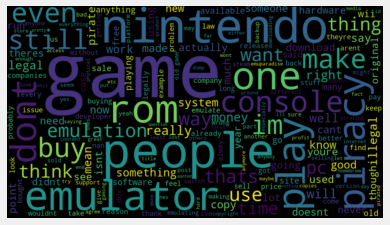

In [19]:
from matplotlib import pyplot as plt
comments_df_clean['body'] = comments_df_clean['body'].astype(str)

#CRIA WORDCLOUD
all_words = ' '.join([selftext for selftext in comments_df_clean['body']])
word_cloud = WordCloud(width = 1280, height = 720, random_state = 32, max_font_size = 256).generate(all_words)

plt.imshow(word_cloud, interpolation = 'bilinear')
plt.axis('off')
plt.savefig('comments_wordcloud.png', dpi=600)
plt.show()

/home/lucasxavier/.local/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:title={'center':'Análise de Sentimento Comentários'}, xlabel='Polarity', ylabel='Subjectivity'>

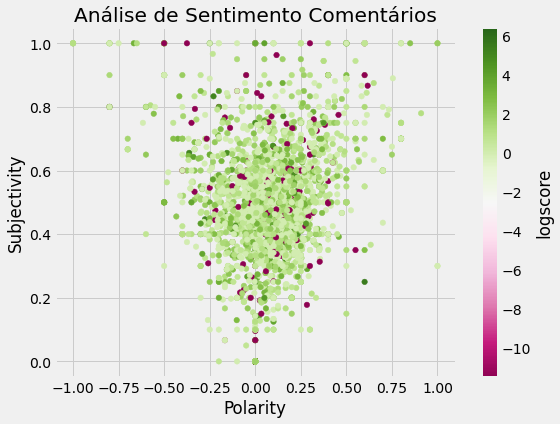

In [20]:
#PARÂMETROS PARA NORMALIZAÇÃO DO RESULTADO
epsilon = 1e-5   
comments_df_clean['logscore'] = np.log(comments_df_clean['score'] + epsilon)

#PLOTA GRÁFICO RELACIONANDO POLARIDADE, SUBJETIVIDADE E SCORE (LOG)
comments_df_clean.plot.scatter(x='Polarity',
                              y='Subjectivity',
                              c='logscore',
                              colormap='PiYG',
                              title='Análise de Sentimento Comentários',
                              s = 30,
                              figsize = (8,6))

array([[<AxesSubplot:xlabel='Subjectivity', ylabel='score'>]],
      dtype=object)

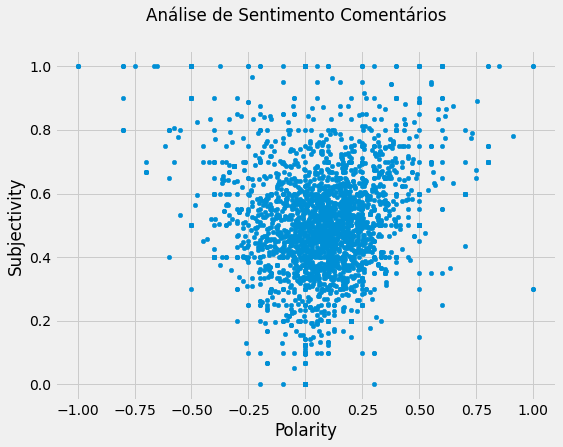

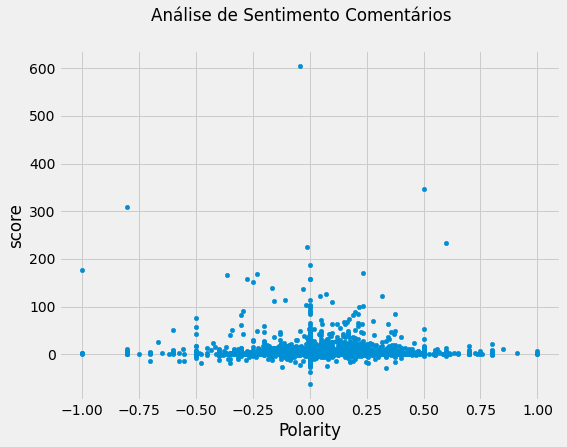

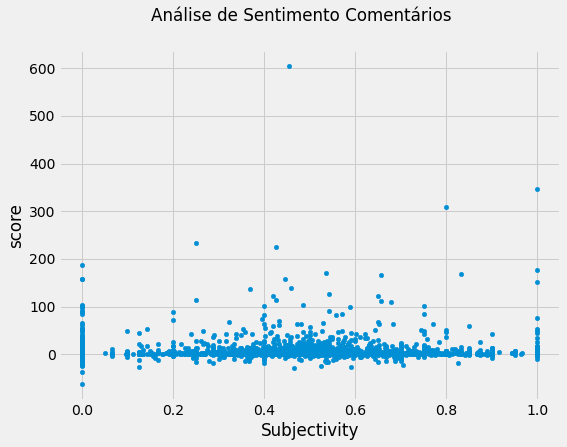

In [21]:
#PLOTA SEPARADAMENTE

#POLARIDADE X SUBJETIVIDADE
comments_df_clean.plot.scatter(subplots=True, layout=(1,1), x='Polarity',
                              y='Subjectivity',
                              title='Análise de Sentimento Comentários',
                              figsize = (8,6))

#POLARIDADE X SCORE
comments_df_clean.plot.scatter(subplots=True, layout=(1,1), x='Polarity',
                              y='score',
                              title='Análise de Sentimento Comentários',
                              figsize = (8,6))

#SUBJETIVIDADE X SCORE
comments_df_clean.plot.scatter(subplots=True, layout=(1,1), x='Subjectivity',
                              y='score',
                              title='Análise de Sentimento Comentários',
                              figsize = (8,6))

### Submissões

In [22]:
#CARREGA CSV SALVO PREVIAMENTE
submissions_df_clean = pd.read_csv('submissions_df_clean.csv', sep=';')
submissions_df_clean.head()

,id_sub,score,subreddit,title,sefltext,tk_sefltext
0,95mcku,1016,emulation,The End of Emuparadise (xpost from r/retrogaming),i wont be linking the site because i not sure ...,"['wont', 'link', 'site', 'sure', 'count', 'pir..."
1,3fm5mp,601,3DS,Homebrew and Piracy are not synonyms,there seems to be a lot of people on this subr...,"['seem', 'lot', 'people', 'subreddit', 'judgin..."
2,95l6p0,371,retrogaming,The End of Emupardise,i wont be linking the site because i not sure ...,"['wont', 'link', 'site', 'sure', 'count', 'pir..."
3,4ibsl4,257,emulation,Do emulator players really use their emulators...,i have dumped a few roms from my old and gba ...,"['dump', 'rom', 'old', 'gba', 'cart', 'vast', ..."
4,5xvi2q,25,pcgaming,With emulating zelda BOTW being the top post o...,personally i understand both sides of the emul...,"['personally', 'understand', 'side', 'emulator..."


In [23]:
#FUNÇÃO QUE DEFINE SUBJETIVIDADE E POLARIDADE DAS SUBMISSIONS

def get_subjectivity(text):
    text = str(text)
    return TextBlob(text).sentiment.subjectivity

def get_polarity(text):
    text = str(text)
    return TextBlob(text).sentiment.polarity

#CRIA COLUNAS DE SUBJ E POLAR NO DF
submissions_df_clean['Subjectivity'] = submissions_df_clean['sefltext'].apply(get_subjectivity)
submissions_df_clean['Polarity'] = submissions_df_clean['sefltext'].apply(get_polarity)

#MOSTRA RESULTADOS
submissions_df_clean.head()

,id_sub,score,subreddit,title,sefltext,tk_sefltext,Subjectivity,Polarity
0,95mcku,1016,emulation,The End of Emuparadise (xpost from r/retrogaming),i wont be linking the site because i not sure ...,"['wont', 'link', 'site', 'sure', 'count', 'pir...",0.558463,0.222371
1,3fm5mp,601,3DS,Homebrew and Piracy are not synonyms,there seems to be a lot of people on this subr...,"['seem', 'lot', 'people', 'subreddit', 'judgin...",0.445068,0.269048
2,95l6p0,371,retrogaming,The End of Emupardise,i wont be linking the site because i not sure ...,"['wont', 'link', 'site', 'sure', 'count', 'pir...",0.558463,0.222371
3,4ibsl4,257,emulation,Do emulator players really use their emulators...,i have dumped a few roms from my old and gba ...,"['dump', 'rom', 'old', 'gba', 'cart', 'vast', ...",0.476603,-0.037500
4,5xvi2q,25,pcgaming,With emulating zelda BOTW being the top post o...,personally i understand both sides of the emul...,"['personally', 'understand', 'side', 'emulator...",0.450157,0.035574


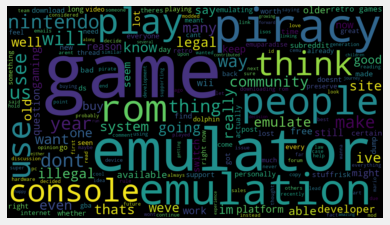

In [24]:
submissions_df_clean['sefltext'] = submissions_df_clean['sefltext'].astype(str)

#CRIA WORDCLOUD
all_words = ' '.join([selftext for selftext in submissions_df_clean['sefltext']])
word_cloud = WordCloud(width = 1280, height = 720, random_state = 32, max_font_size = 256).generate(all_words)

plt.imshow(word_cloud, interpolation = 'bilinear')
plt.axis('off')
plt.savefig('submissions_wordcloud.png', dpi=600)
plt.show()

<AxesSubplot:title={'center':'Análise de Sentimento Submissions'}, xlabel='Polarity', ylabel='Subjectivity'>

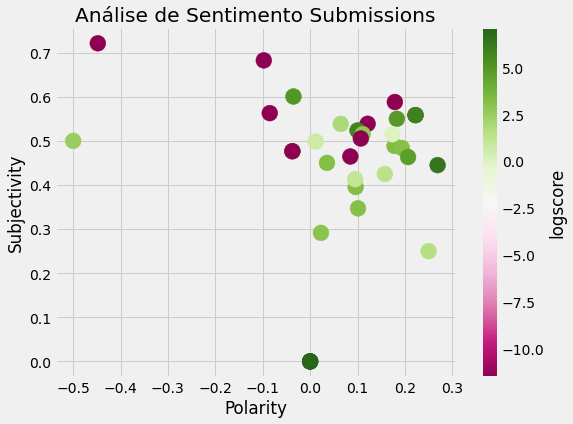

In [25]:
#PARÂMETROS PARA NORMALIZAÇÃO DO RESULTADO
epsilon = 1e-5   
submissions_df_clean['logscore'] = np.log(submissions_df_clean['score'] + epsilon)

#PLOTA GRÁFICO RELACIONANDO POLARIDADE, SUBJETIVIDADE E SCORE (LOG)
submissions_df_clean.plot.scatter(x='Polarity',
                              y='Subjectivity',
                              c='logscore',
                              colormap='PiYG',
                              title='Análise de Sentimento Submissions',
                              s = 250,
                              figsize = (8,6))

## Parte IV - Análise de Tópicos por __[Alocação latente de Dirichlet (LDA)](https://pt.wikipedia.org/wiki/Aloca%C3%A7%C3%A3o_latente_de_Dirichlet)__

In [26]:
#CARREGA PACOTES E CSV SALVO PREVIAMENTE
import sys
import re, numpy as np, pandas as pd
from pprint import pprint

import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
stop_words = stopwords.words('english')

%matplotlib inline
warnings.filterwarnings("ignore",category=DeprecationWarning)
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

df = pd.read_csv('comments_df_clean.csv', sep=';')
df.head()

,id_sub,id_comm,score,tree_order,body,tk_body
0,95mcku,e3ugdsv,1,0,given that in light of this its no longer a ro...,"['given', 'light', 'longer', 'rom', 'site', 'l..."
1,95mcku,e3u0qv8,347,0,rip my favorite rom site time to get a hardriv...,"['rip', 'favorite', 'rom', 'site', 'time', 'ge..."
2,95mcku,e3tz4ir,159,0,feels like part of my life is gone,"['feel', 'like', 'part', 'life', 'go']"
3,95mcku,e3u2ypz,138,0,i wish there was some sort of law or rule that...,"['wish', 'sort', 'law', 'rule', 'would', 'allo..."
4,95mcku,e3uc1zr,88,0,sigh thanks nintendo,"['sigh', 'thanks', 'nintendo']"


In [27]:
#CRIA LISTA COM VALORES CONTINOS NA COLUNA DE CORPO DOS COMENTÁRIOS
data = df['body'].values.tolist()

In [28]:
#TOKENIZA TEXTOS, RETIRA PALAVRAS DE TRANSIÇÃO E LEMMANIZA PALAVRAS
import nltk
from nltk import word_tokenize
from nltk.corpus import wordnet as wn

def get_lemma(word):
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
        return lemma
    
tokenized_list_of_sentences = []
list_of_sentences = []
en_stop = set(nltk.corpus.stopwords.words('english'))

for row_index,row in comments_df_clean_1.iterrows():
    raw = comments_df_clean_1['body'][row_index]
    tokens = nltk.word_tokenize(raw)
    tokens = [token for token in tokens if token not in en_stop]
    tokens = [get_lemma(token) for token in tokens]
    tokens = [token for token in tokens if not token.startswith("linkedhttp")]
    tokens = [token for token in tokens if not token == 'nan']
    
    tokenized_list_of_sentences.append(tokens)
    list_of_sentences.append(raw)

In [29]:
#CRIA BIGRAMAS E TRIGRAMAS
bigram = gensim.models.Phrases(tokenized_list_of_sentences, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[tokenized_list_of_sentences], threshold=100)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [30]:
#CRIA FUNÇÃO PARA PROCESSAR TEXTOS CONTIDOS NOS COMETÁRIOS USANDO O MODELO DE BIGRAMAS E TRIGRAMAS CRIADO PREVIAMENTE
def process_words(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """Remove Stopwords, Form Bigrams, Trigrams and Lemmatization"""
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    texts_out = []
    nlp = spacy.load('en', disable=['parser', 'ner'])
    #LEMMANIZA NOVAMENTE
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    #REMOVE PALAVRAS DE TRANSIÇÃO NOVAMENTE
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
    return texts_out

#APLICA FUNÇÃO CRIADA
data_ready = process_words(tokenized_list_of_sentences)

In [31]:
#CRIA DICIONÁRIO
id2word = corpora.Dictionary(data_ready)

#CRIA O CORPUS
corpus = [id2word.doc2bow(text) for text in data_ready]

#CRIA MODELO LDA COM TRÊS TÓPICOS
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=3, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

#RETORNA TÓPICOS GERADOS E PRINCIPAIS TERMOS POR TÓPICO COM PESO
pprint(lda_model.print_topics())

[(0,
  '0.031*"good" + 0.019*"know" + 0.015*"find" + 0.014*"enough" + 0.014*"could" '
  '+ 0.013*"piracy" + 0.011*"well" + 0.011*"level" + 0.010*"see" + '
  '0.010*"come"'),
 (1,
  '0.051*"game" + 0.020*"would" + 0.019*"play" + 0.017*"make" + 0.016*"people" '
  '+ 0.015*"use" + 0.012*"rom" + 0.012*"buy" + 0.011*"go" + 0.010*"want"'),
 (2,
  '0.037*"take" + 0.031*"think" + 0.021*"need" + 0.015*"try" + 0.015*"site" + '
  '0.012*"keep" + 0.009*"bit" + 0.009*"link" + 0.008*"put" + 0.008*"let"')]


In [32]:
#CRIA FUNÇÃO PARA OBTER TÓPICO PRINCIPAL POR COMENTÁRIO E CRIAR NOVO DATAFRAME COM DADOS
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    sent_topics_df = pd.DataFrame()

    # OBTÉM TÓPICO DOMINANTE POR COMENTÁRIO
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # OBTÉM PALAVRAS CHAVE E DO TÓPICO DOMINANTE E PESOS
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # ADICIONA TEXTO ORIGINAL
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_ready)

# FORMATA E RETORNA DATAFRAME
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,2.0,0.4522,"take, think, need, try, site, keep, bit, link,...","[give, light, long, rom, site, long, major, co..."
1,1,1.0,0.6823,"game, would, play, make, people, use, rom, buy...","[favorite, rom, site, time, hardrive, backup, ..."
2,2,1.0,0.6606,"game, would, play, make, people, use, rom, buy...","[feel, part, life, go]"
3,3,1.0,0.7960,"game, would, play, make, people, use, rom, buy...","[law, rule, would, allow, video, game, defunct..."
4,4,0.0,0.3333,"good, know, find, enough, could, piracy, well,...",[]
5,5,1.0,0.8195,"game, would, play, make, people, use, rom, buy...","[real, shame, glad, able, stay, around, long, ..."
6,6,2.0,0.5192,"take, think, need, try, site, keep, bit, link,...","[go, fridge, beer, go, site, feel, sad]"
7,7,1.0,0.5700,"game, would, play, make, people, use, rom, buy...","[offer, well, alternative, reason, music, pira..."
8,8,0.0,0.5921,"good, know, find, enough, could, piracy, well,...","[bad, lot, stuff, could, find, anywhere, else,..."
9,9,1.0,0.5169,"game, would, play, make, people, use, rom, buy...","[emuparadise, definitely, help, many, people, ..."


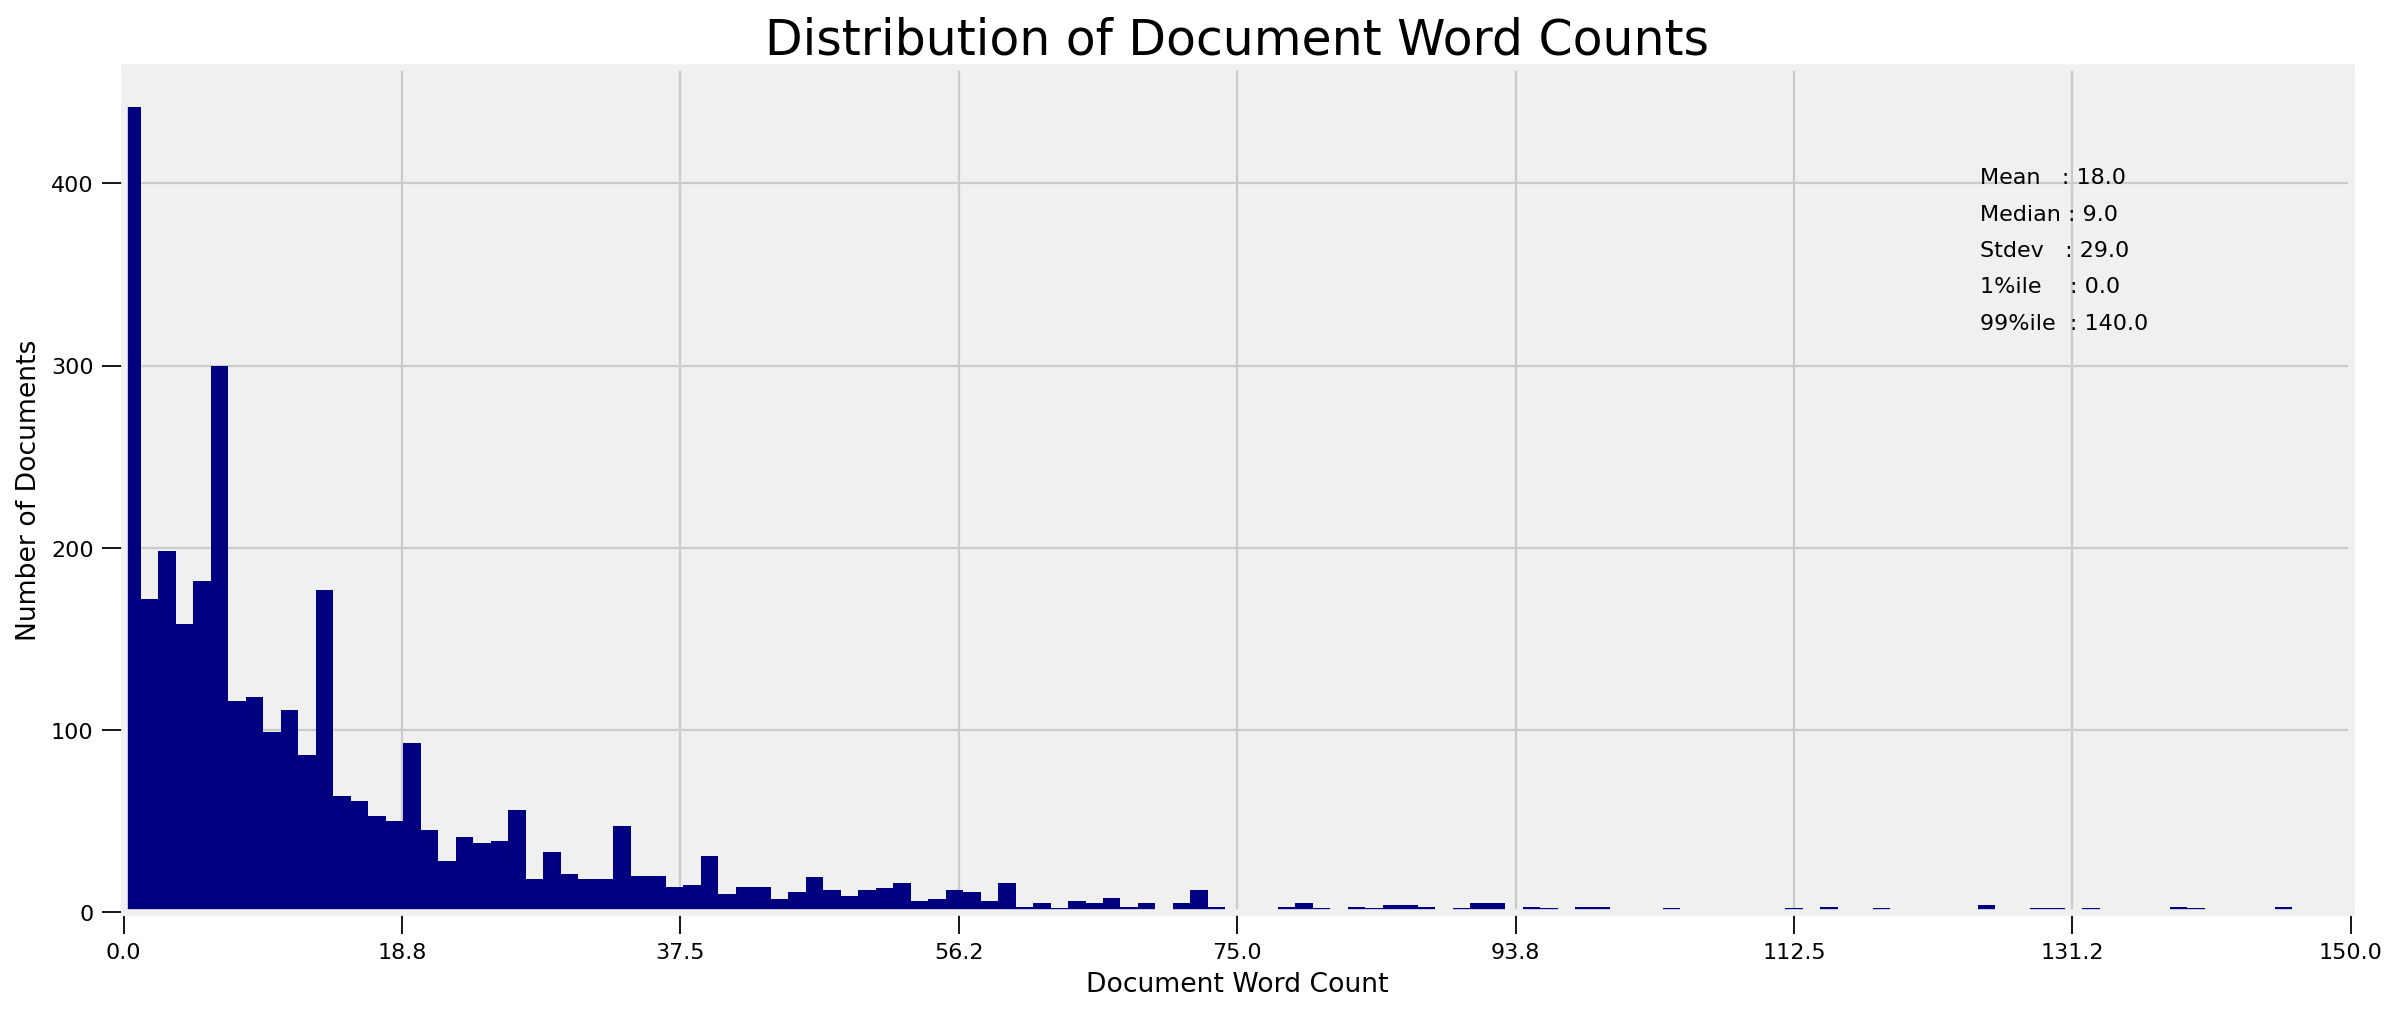

In [33]:
# CRIA LISTA DE COMPRIMENTO DE COMENTÁRIOS
doc_lens = [len(d) for d in df_dominant_topic.Text]

# PLOTA HISTOGRAMA DE COMPRIMENTO DE COMENTÁRIOS E ADICIONA MÉDIA, MEDIANA, DESVIO PADRÃO, 1-PERCENTIL E 99-PERCENTIL
plt.figure(figsize=(16,7), dpi=160)
plt.hist(doc_lens, bins = 500, color='navy')
plt.text(125, 400, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(125, 380, "Median : " + str(round(np.median(doc_lens))))
plt.text(125, 360, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(125, 340, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(125, 320, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 150), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=10)
plt.xticks(np.linspace(0,150,9))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=22))
plt.show()

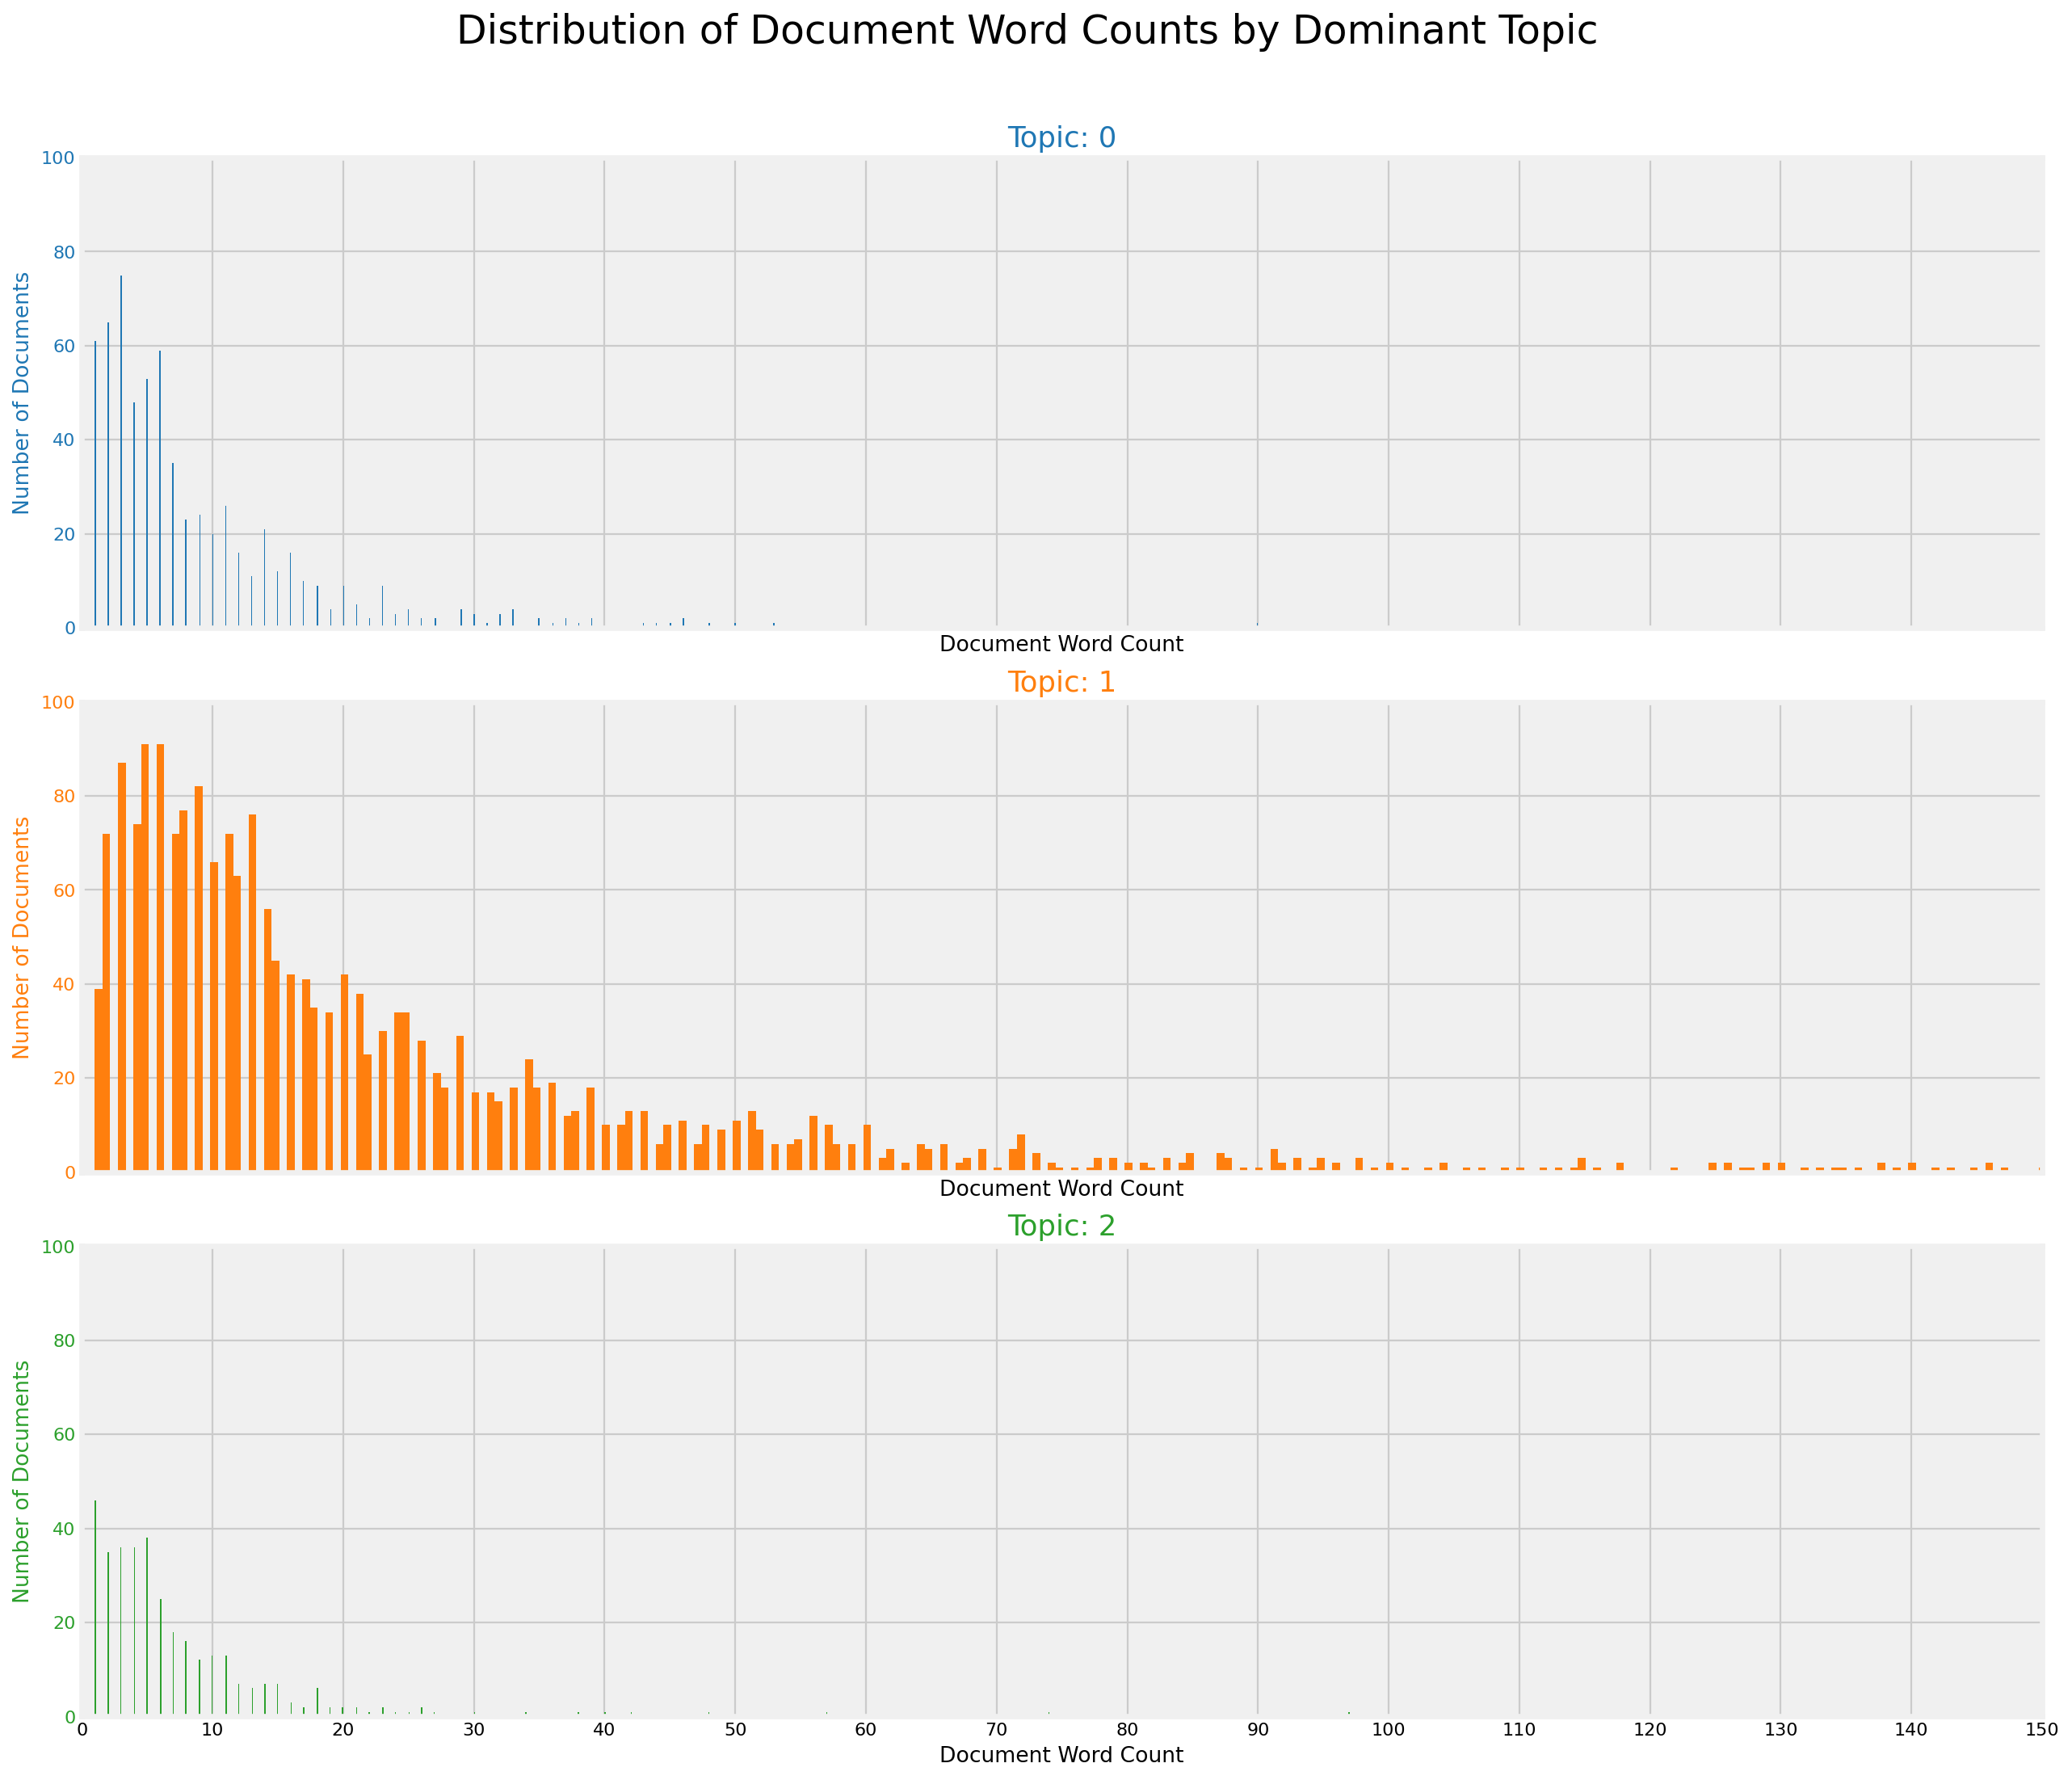

In [34]:
#PLOTA HISTOGRAMAS TAL QUAL O ANTERIOR, UM PARA CADA TÓPICO
import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(3, 1, figsize=(16,14), dpi=160, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):    
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins = 1000, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    #sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 150), xlabel='Document Word Count', ylim=(0, 100))
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,150,16))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)
plt.show()

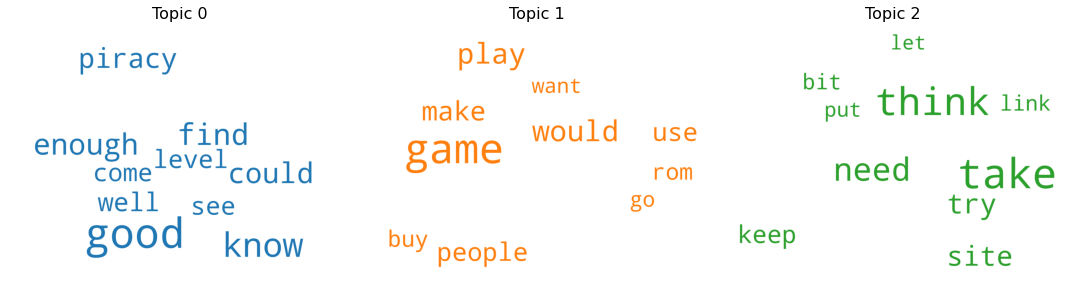

In [35]:
#PLOTA UMA WORDCLOUD PARA CADA TÓPICO
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=20,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(1, 3, figsize=(15,15), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

<ipython-input-36-6d554eac9270>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
<ipython-input-36-6d554eac9270>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
<ipython-input-36-6d554eac9270>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')


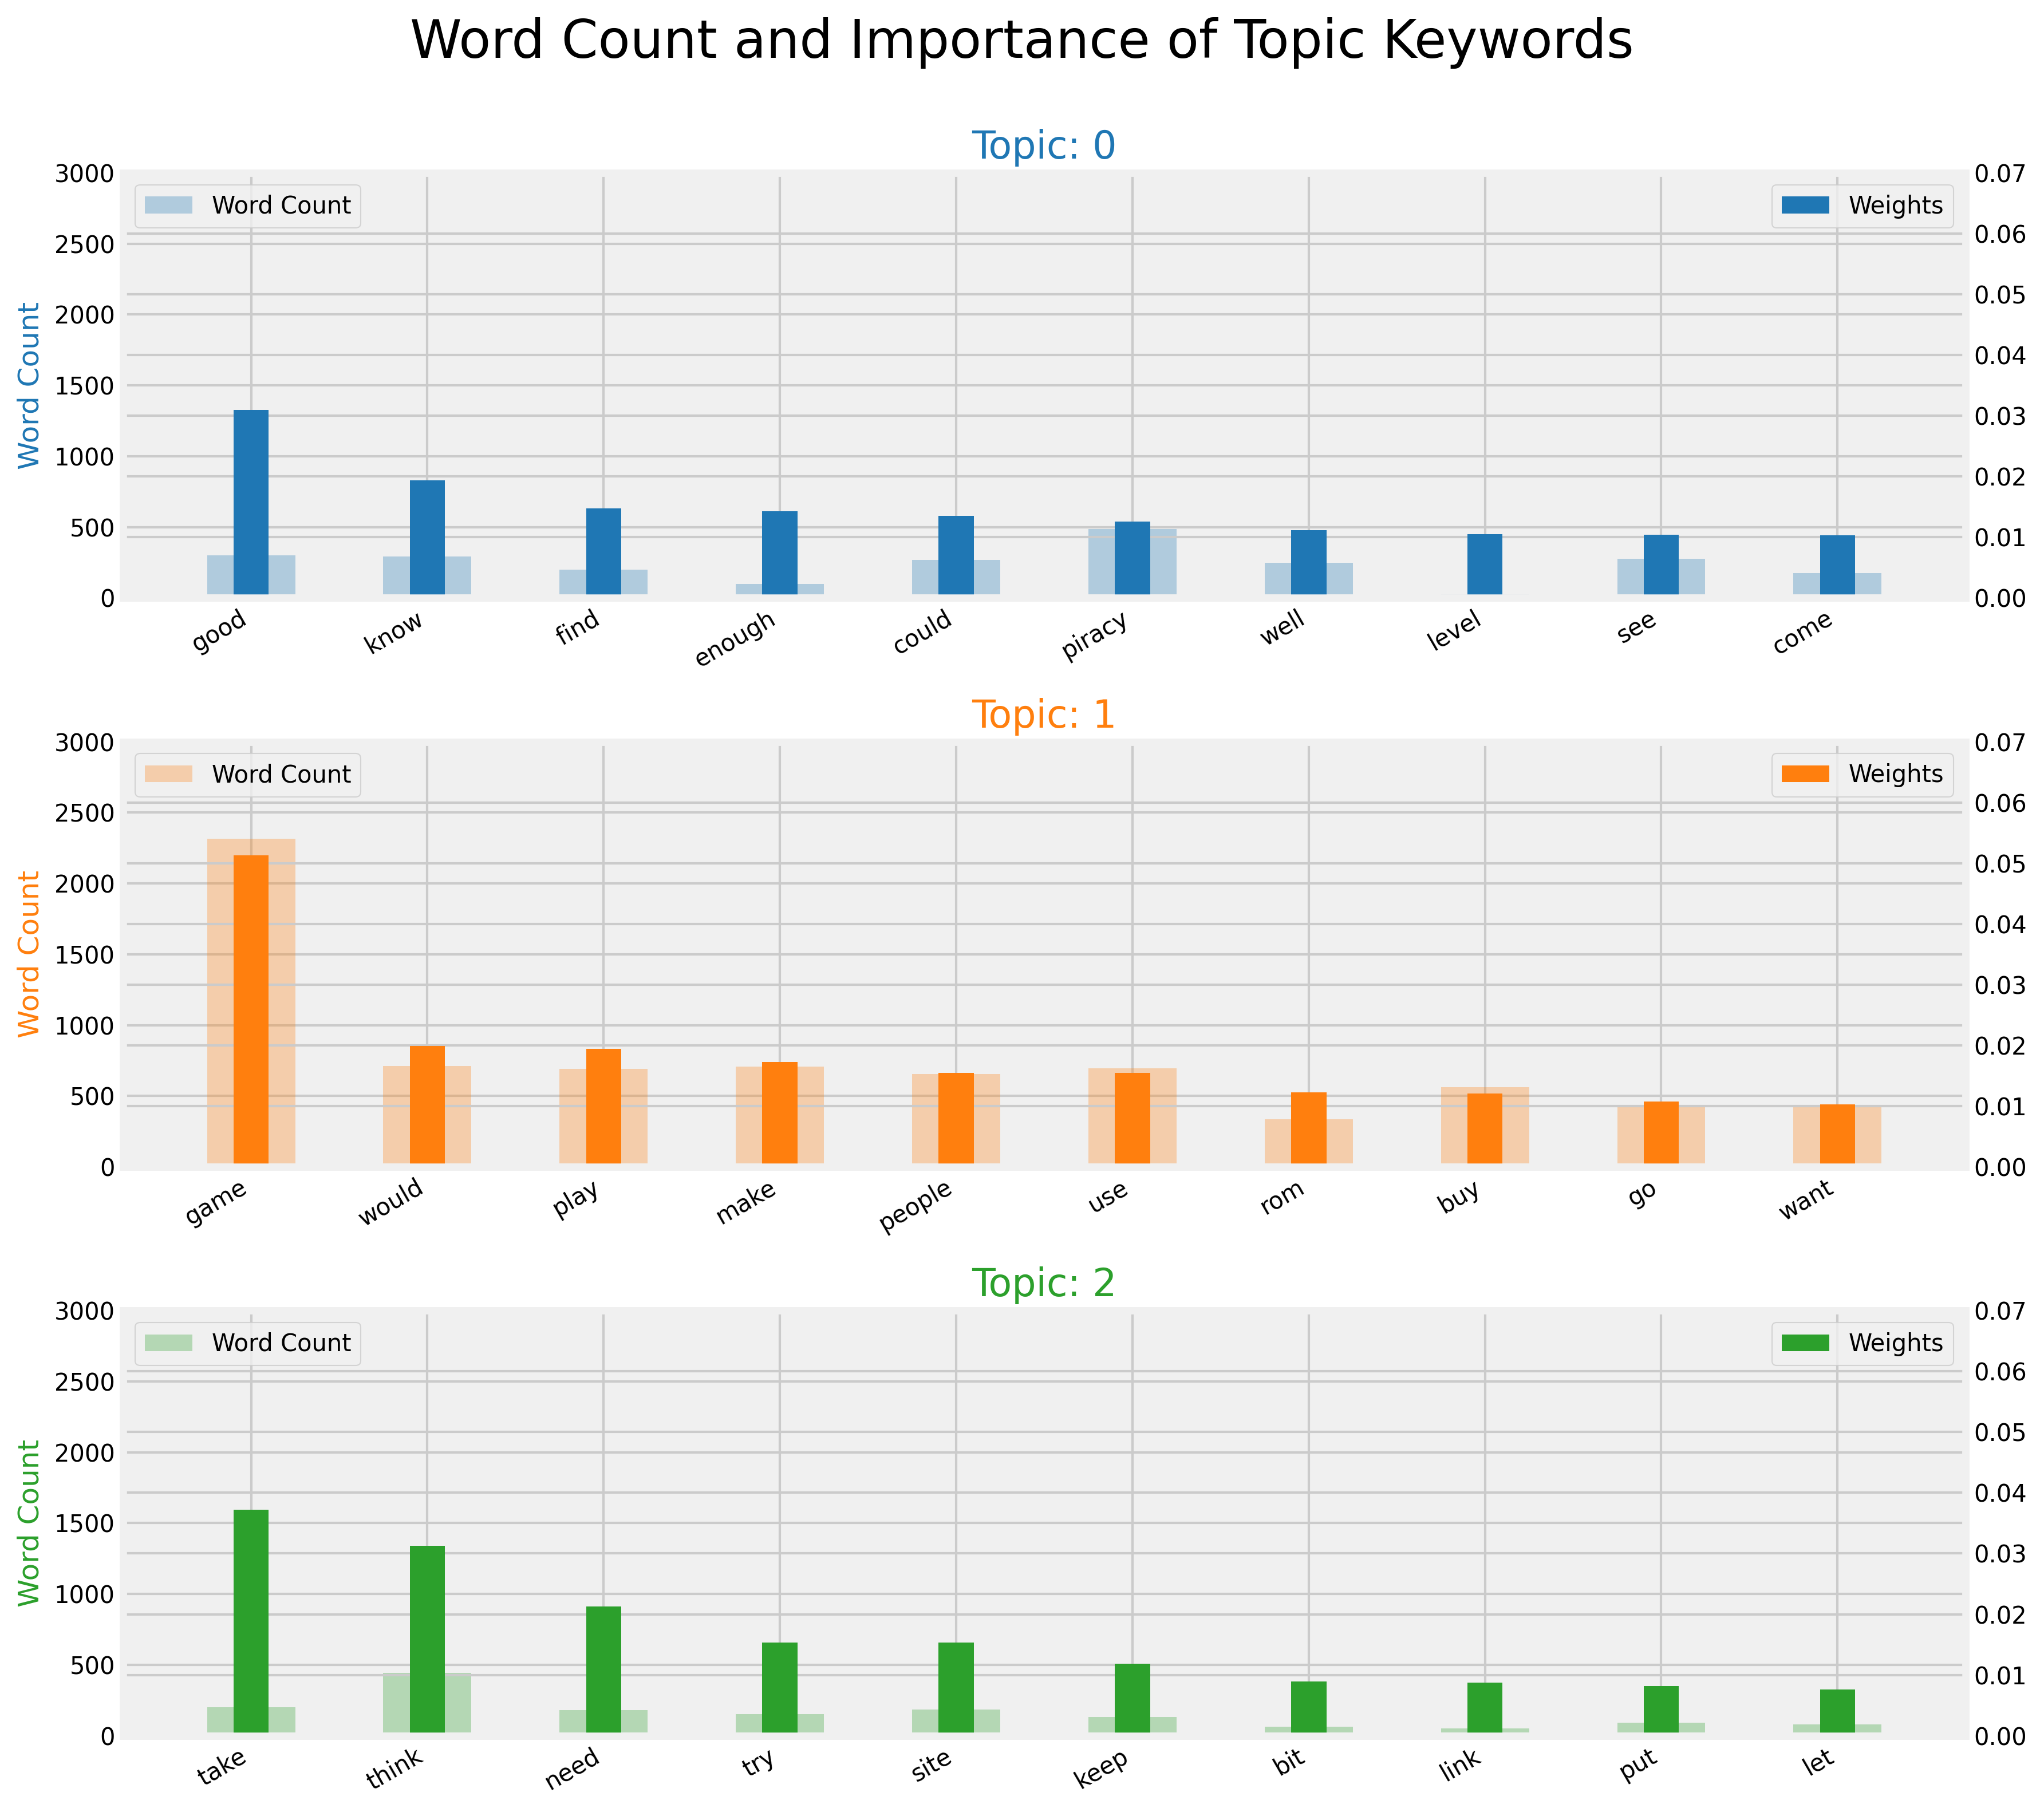

In [36]:
#CRIA UM GRÁFICO DE BARRAS PARA CADA TÓPICO COM AS PALAVRAS CHAVE DE CADA TÓPICO, EM COR SÓLIDA E BARRA FINA O PESO PARA O TÓPICO
#E COM TRANSPARÊNCIA E BARRA LARGA A FREQUÊNCIA TOTAL NOS COMENTÁRIOS DO TÓPICO.

from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data_ready for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

fig, axes = plt.subplots(3, 1, figsize=(12,10), sharey=True, dpi=300)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.070); ax.set_ylim(0, 3000)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

In [37]:
# Sentence Coloring of N Sentences
def topics_per_document(model, corpus, start=0, end=1):
    corpus_sel = corpus[start:end]
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus_sel):
        topic_percs, wordid_topics, wordid_phivalues = model[corp]
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return(dominant_topics, topic_percentages)

dominant_topics, topic_percentages = topics_per_document(model=lda_model, corpus=corpus, end=-1)  

# Distribution of Dominant Topics in Each Document
df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])
dominant_topic_in_each_doc = df.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in lda_model.show_topics(formatted=False) 
                                 for j, (topic, wt) in enumerate(topics) if j < 3]

df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
df_top3words.reset_index(level=0,inplace=True)

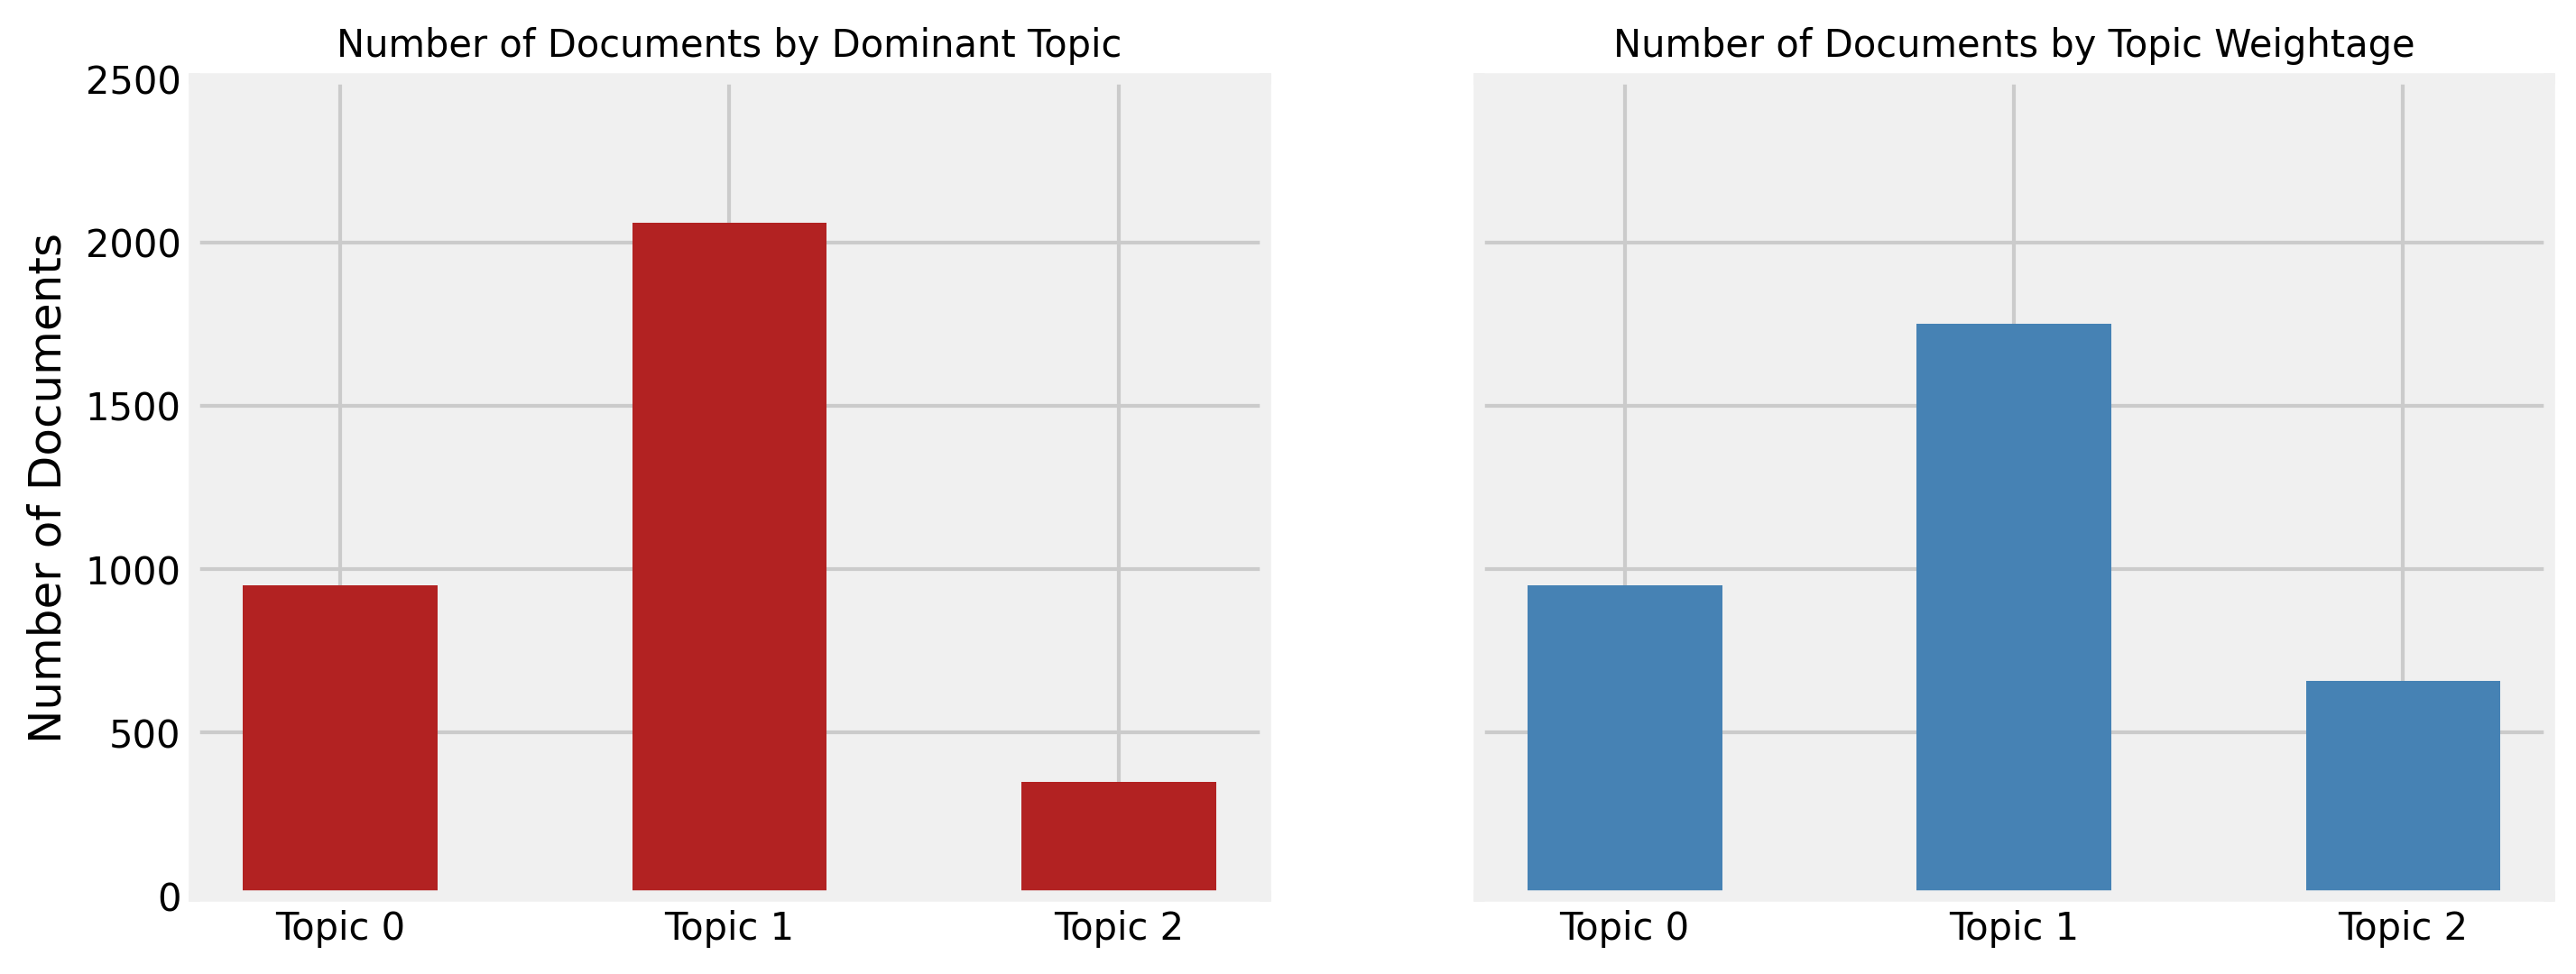

In [38]:
#PLOTA GRÁFICOS ANALISANDO...
from matplotlib.ticker import FuncFormatter

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), dpi=300, sharey=True)

#... TOTAL DE TEXTOS POR TÓPICOS
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.5, color='firebrick')
ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
tick_formatter = FuncFormatter(lambda x, pos: 'Topic ' + str(x))
ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Number of Documents by Dominant Topic', fontdict=dict(size=10))
ax1.set_ylabel('Number of Documents')
ax1.set_ylim(0, 2500)

#... TOTAL DE PESO DE TEXTOS POR TÓPICOS
ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc, width=.5, color='steelblue')
ax2.set_xticks(range(df_topic_weightage_by_doc.index.unique().__len__()))
ax2.xaxis.set_major_formatter(tick_formatter)
ax2.set_title('Number of Documents by Topic Weightage', fontdict=dict(size=10))

plt.show()

In [39]:
# PLOTA GRÁFICO 2D COM DISTRIBUIÇÃO DOS COMENTÁRIOS SEPARADOS POR TÓPICOS
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

#PESOS DE TÓPICOS
topic_weights = []
for i, row_list in enumerate(lda_model[corpus]):
    topic_weights.append([w for i, w in row_list[0]])

#LISTA COM PESOS DE TÓPICOS    
arr = pd.DataFrame(topic_weights).fillna(0).values

#FILTRA POR TÓPICOS BEM SEPARADOS
arr = arr[np.amax(arr, axis=1) > 0.35]

#ASSOCIA TÓPICO DOMINANTE POR COMENTÁRIO
topic_num = np.argmax(arr, axis=1)

#REDUÇÃO DIMENSIONAL USANDO TSNE
tsne_model = TSNE(n_components=2, verbose=1, perplexity=50, 
                  random_state=0, angle=0.75, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

#PLOTA GRÁFICO USANDO BOKEH
output_notebook()
n_topics = 3
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 3057 samples in 0.001s...
[t-SNE] Computed neighbors for 3057 samples in 0.064s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3057
[t-SNE] Computed conditional probabilities for sample 2000 / 3057
[t-SNE] Computed conditional probabilities for sample 3000 / 3057
[t-SNE] Computed conditional probabilities for sample 3057 / 3057
[t-SNE] Mean sigma: 0.022937
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.908066
[t-SNE] KL divergence after 1000 iterations: 0.466728


Loading BokehJS ...

In [40]:
all_token_full = []

for row_index,row in comments_df_clean_2.iterrows():
        all_token_full.append(comments_df_clean_2['tk_body'][row_index])

In [41]:
from gensim.models import  Word2Vec, KeyedVectors

model = Word2Vec(all_token_full, window=10, min_count=10, size=200)

print('Words most similar to emulation')
print(*model.wv.most_similar('emulation'), sep = "\n")
print('-------------------------------')
print('Words most similar to emulator')
print(*model.wv.most_similar('emulator'), sep = "\n")
print('-------------------------------')
print('Words most similar to piracy')
print(*model.wv.most_similar('piracy'), sep = "\n")
print('-------------------------------')
print('Words most similar to pirate')
print(*model.wv.most_similar('pirate'), sep = "\n")
print('-------------------------------')
print('Words most similar to illegal')
print(*model.wv.most_similar('illegal'), sep = "\n")
print('-------------------------------')
print('Words most similar to rom')
print(*model.wv.most_similar('rom'), sep = "\n")
print('-------------------------------')
print('Words most similar to right')
print(*model.wv.most_similar('right'), sep = "\n")
print('-------------------------------')
print('Words most similar to wrong')
print(*model.wv.most_similar('wrong'), sep = "\n")

Words most similar to emulation
('theyre', 0.9999358057975769)
('great', 0.9999331831932068)
('far', 0.9999325275421143)
('big', 0.9999308586120605)
('around', 0.9999299049377441)
('example', 0.9999288320541382)
('via', 0.9999287128448486)
('also', 0.9999284744262695)
('come', 0.9999268054962158)
('platform', 0.9999258518218994)
-------------------------------
Words most similar to emulator
('hardware', 0.9999206066131592)
('computer', 0.9999198317527771)
('actual', 0.9999186992645264)
('either', 0.999915599822998)
('create', 0.9999154806137085)
('dump', 0.9999147653579712)
('since', 0.9999143481254578)
('using', 0.9999126195907593)
('legally', 0.9999123215675354)
('require', 0.9999110698699951)
-------------------------------
Words most similar to piracy
('wrong', 0.9998976588249207)
('youre', 0.9998969435691833)
('theft', 0.9998946189880371)
('nothing', 0.9998935461044312)
('fact', 0.9998915195465088)
('isnt', 0.999890923500061)
('say', 0.9998908638954163)
('point', 0.999888300895690

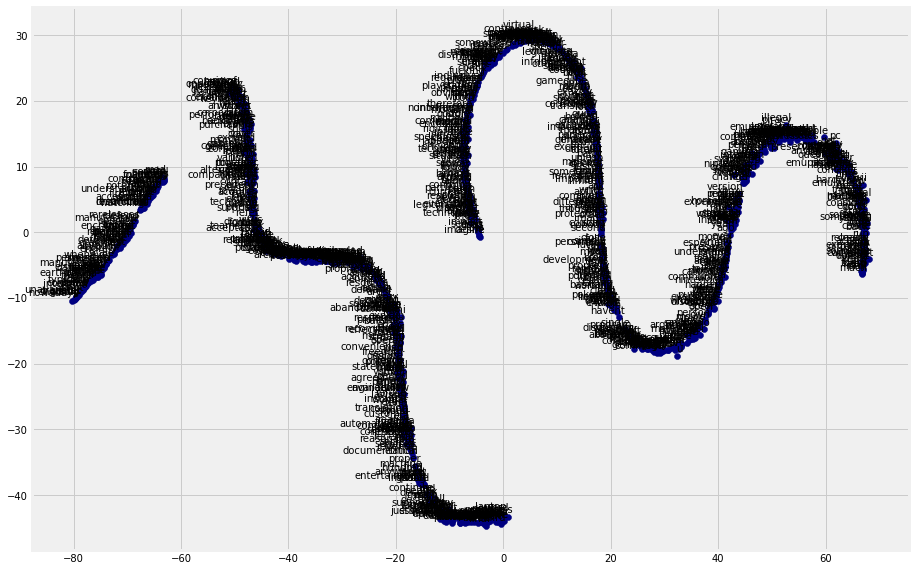

In [42]:
# import the t-SNE library and matplotlib for plotting  
from sklearn.manifold import TSNE  
import matplotlib.pyplot as plt  
  
# define the function to compute the dimensionality reduction  
# and then produce the biplot  
def tsne_plot(model):  
    "Creates a TSNE model and plots it"  
    labels = []  
    tokens = []  

    for word in model.wv.vocab:  
        tokens.append(model.wv[word])  
        labels.append(word)  

    tsne_model = TSNE(perplexity=25, n_components=2, init='pca', n_iter=2500, angle=0.99, random_state=1)  
    new_values = tsne_model.fit_transform(tokens)  

    x = []  
    y = []  
    for value in new_values:  
        x.append(value[0])  
        y.append(value[1])  

    plt.figure(figsize=(14, 10))   
    for i in range(len(x)):  
        plt.scatter(x[i],y[i], c = 'navy')
        plt.annotate(labels[i],  
                    xy=(x[i], y[i]),  
                    xytext=(5, 2),  
                    textcoords='offset points',  
                    ha='right',  
                    va='bottom')  
    plt.show()  
  
#call the function on our dataset  
tsne_plot(model)  

In [43]:
from gensim.models import  Word2Vec, KeyedVectors

model = Word2Vec(all_token_full, window=10, min_count=60, size=200)

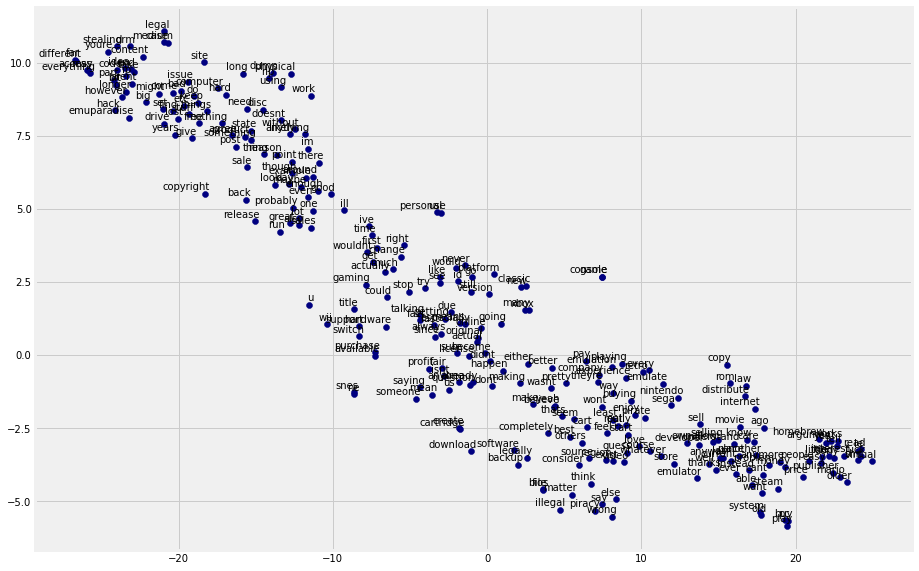

In [44]:
# import the t-SNE library and matplotlib for plotting  
from sklearn.manifold import TSNE  
import matplotlib.pyplot as plt  
  
# define the function to compute the dimensionality reduction  
# and then produce the biplot  
def tsne_plot(model):  
    "Creates a TSNE model and plots it"  
    labels = []  
    tokens = []  

    for word in model.wv.vocab:  
        tokens.append(model.wv[word])  
        labels.append(word)  

    tsne_model = TSNE(perplexity=25, n_components=2, init='pca', n_iter=2500, angle=0.99, random_state=1)  
    new_values = tsne_model.fit_transform(tokens)  

    x = []  
    y = []  
    for value in new_values:  
        x.append(value[0])  
        y.append(value[1])  

    plt.figure(figsize=(14, 10))   
    for i in range(len(x)):  
        plt.scatter(x[i],y[i], c = 'navy')
        plt.annotate(labels[i],  
                    xy=(x[i], y[i]),  
                    xytext=(5, 2),  
                    textcoords='offset points',  
                    ha='right',  
                    va='bottom')  
    plt.show()  
  
#call the function on our dataset  
tsne_plot(model)  

## Parte V - Análise por Tópico

### Tópico 0

In [45]:
import pandas as pd

df =  pd.read_csv('df_comments_topics.csv', sep=',')
df_zero = df[df['topic'] == 0.0]

df_zero.sort_values('topic_contrib', ascending=False)

,id_sub,id_comm,score,tree_order,body,tk_body,keywords,topic,topic_contrib
657,3fm5mp,ctpydtr,5,0,i what are you even arguingbecause the post yo...,"['even', 'arguingbecause', 'post', 'youre', 'r...","good, know, find, enough, could, piracy, well,...",0.0,0.9474
440,3fm5mp,ctpvcch,6,0,i dont disagree but this seems like preaching ...,"['dont', 'disagree', 'seem', 'like', 'preachin...","good, know, find, enough, could, piracy, well,...",0.0,0.9276
3233,9yx6g3,ea573hm,3,0,you dont consider piracy theft and have the ba...,"['dont', 'consider', 'piracy', 'theft', 'ball'...","good, know, find, enough, could, piracy, well,...",0.0,0.9212
560,3fm5mp,ctpvap9,-1,0,my point was basically the same as yours here ...,"['point', 'basically', 'couldve', 'word', 'lit...","good, know, find, enough, could, piracy, well,...",0.0,0.9165
3227,9yx6g3,ea56umq,-1,0,very intelligent reply thank youi guess i shou...,"['intelligent', 'reply', 'thank', 'youi', 'gue...","good, know, find, enough, could, piracy, well,...",0.0,0.9162
...,...,...,...,...,...,...,...,...,...
1360,5xvi2q,delvxeo,0,0,cool speak for yourself,"['cool', 'speak']","good, know, find, enough, could, piracy, well,...",0.0,0.3333
1354,5xvi2q,del8l0n,1,0,NaN,[],"good, know, find, enough, could, piracy, well,...",0.0,0.3333
1315,5xvi2q,delz8j2,1,0,im okay with it,"['im', 'okay']","good, know, find, enough, could, piracy, well,...",0.0,0.3333
1290,5xvi2q,del82wi,20,0,NaN,[],"good, know, find, enough, could, piracy, well,...",0.0,0.3333


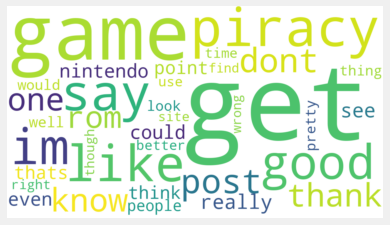

In [46]:
#CRIA WORDCLOUD

import re
import string

all_words = ''
all_words = ' '.join([tk_body for tk_body in df_zero['tk_body']])
all_words = re.sub('[%s]' % re.escape(string.punctuation), '', all_words)
all_words

from nltk.corpus import stopwords
stop_words = stopwords.words('english')

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

word_cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=1280,
                  height=720,
                  max_words=35).generate(all_words)


plt.imshow(word_cloud, interpolation = 'bilinear')
plt.axis('off')
plt.savefig('topic0.png', dpi=300)
plt.show()

In [47]:
#FUNÇÃO QUE DEFINE SUBJETIVIDADE E POLARIDADE DAS SUBMISSIONS
from textblob import TextBlob
pd.options.mode.chained_assignment = None 

def get_subjectivity(text):
    text = str(text)
    return TextBlob(text).sentiment.subjectivity

def get_polarity(text):
    text = str(text)
    return TextBlob(text).sentiment.polarity

#CRIA COLUNAS DE SUBJ E POLAR NO DF
df_zero['Subjectivity'] = df_zero['body'].apply(get_subjectivity)
df_zero['Polarity'] = df_zero['body'].apply(get_polarity)

#MOSTRA RESULTADOS
df_zero.head()

,id_sub,id_comm,score,tree_order,body,tk_body,keywords,topic,topic_contrib,Subjectivity,Polarity
4,95mcku,e3uc1zr,88,0,sigh thanks nintendo,"['sigh', 'thanks', 'nintendo']","good, know, find, enough, could, piracy, well,...",0.0,0.3333,0.200000,0.200000
8,95mcku,e3tuuqz,165,0,shit this is bad they have a lot of stuff i co...,"['shit', 'bad', 'lot', 'stuff', 'couldnt', 'fi...","good, know, find, enough, could, piracy, well,...",0.0,0.5921,0.655556,-0.362500
10,95mcku,e3twuw1,88,0,kinda saw this coming ever since the loveroms...,"['kinda', 'saw', 'coming', 'ever', 'since', 'l...","good, know, find, enough, could, piracy, well,...",0.0,0.6933,0.000000,0.000000
11,95mcku,e3tx0wh,75,0,i grew up on the roms i found on that site th...,"['grow', 'rom', 'found', 'site', 'really', 'sad']","good, know, find, enough, could, piracy, well,...",0.0,0.5562,1.000000,-0.500000
17,95mcku,e3u38su,48,0,damn i remember when this site was at the top ...,"['damn', 'remember', 'site', 'top', 'webrings'...","good, know, find, enough, could, piracy, well,...",0.0,0.5192,0.500000,0.227273


/home/lucasxavier/.local/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 0, 'Polaridade')

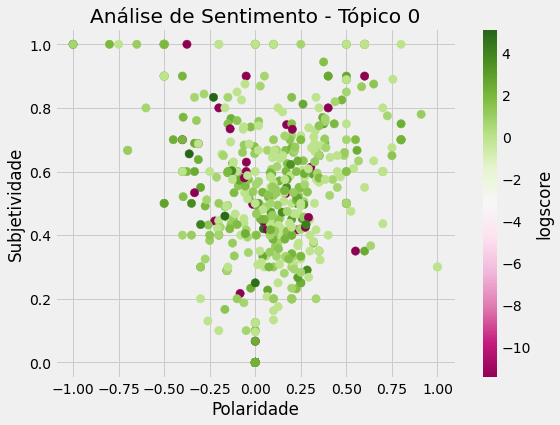

In [48]:
import numpy as np

epsilon = 1e-5   
df_zero['logscore'] = np.log(df_zero['score'] + epsilon)

zero_plot = df_zero.plot.scatter(x='Polarity',
                     y='Subjectivity',
                     c='logscore',
                     colormap='PiYG',
                     title='Análise de Sentimento - Tópico 0',
                     s = 69,
                     figsize = (8,6))

zero_plot.set_ylabel('Subjetividade')
zero_plot.set_xlabel('Polaridade')

In [49]:
#LIMPRA CARACTÉRES INDESEJADOS, CITAÇÕES, CÓDIGOS DO REDDIT E OUTROS
import re
import string

df_zero_clean_1 = pd.DataFrame(columns=['id_sub', 'id_comm', 'score','tree_order','body', 'keywords',
                                        'topic', 'topic_contrib', 'Subjectivity', 'Polarity'])

for row_index,row in df_zero.iterrows():
    text = str(df_zero['body'][row_index])
    split_text = text.splitlines()
    text2 = ''

    for index in split_text:
        if not index.startswith('>'):
            text2 += str(index)
    
    text2 = text2.lower()
    text2 = re.sub('\[.*?\]', '', text2)
    text2 = re.sub('\[.*?\]', '', text2)
    text2 = re.sub('[%s]' % re.escape(string.punctuation), '', text2)
    text2 = re.sub('\w*\d\w*', '', text2)
    text2 = re.sub('[‘’“”…]', '', text2)
    text2 = re.sub('\n', '', text2)
    
    df_zero_clean_1.loc[row_index] = [df_zero['id_sub'][row_index],
                                      df_zero['id_comm'][row_index],
                                      df_zero['score'][row_index],
                                      df_zero['tree_order'][row_index],
                                      text2,
                                      df_zero['keywords'][row_index],
                                      df_zero['topic'][row_index],
                                      df_zero['topic_contrib'][row_index],
                                      df_zero['Subjectivity'][row_index],
                                      df_zero['Polarity'][row_index]
                                     ]
    
df_zero_clean_1.head()

,id_sub,id_comm,score,tree_order,body,keywords,topic,topic_contrib,Subjectivity,Polarity
4,95mcku,e3uc1zr,88,0,sigh thanks nintendo,"good, know, find, enough, could, piracy, well,...",0.0,0.3333,0.200000,0.200000
8,95mcku,e3tuuqz,165,0,shit this is bad they have a lot of stuff i co...,"good, know, find, enough, could, piracy, well,...",0.0,0.5921,0.655556,-0.362500
10,95mcku,e3twuw1,88,0,kinda saw this coming ever since the loveroms...,"good, know, find, enough, could, piracy, well,...",0.0,0.6933,0.000000,0.000000
11,95mcku,e3tx0wh,75,0,i grew up on the roms i found on that site th...,"good, know, find, enough, could, piracy, well,...",0.0,0.5562,1.000000,-0.500000
17,95mcku,e3u38su,48,0,damn i remember when this site was at the top ...,"good, know, find, enough, could, piracy, well,...",0.0,0.5192,0.500000,0.227273


In [50]:
import nltk
from nltk import word_tokenize
from nltk.corpus import wordnet as wn

def get_lemma(word):
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
        return lemma
    
tokenized_list_of_sentences = []
list_of_sentences = []

df_zero_clean_1['body'] = comments_df_clean_1['body'].astype(str)
df_zero_clean_2 = pd.DataFrame(columns=['id_sub', 'id_comm', 'score','tree_order','body', 'tk_body', 'keywords',
                                        'topic', 'topic_contrib', 'Subjectivity', 'Polarity'])
en_stop = set(nltk.corpus.stopwords.words('english'))

for row_index,row in df_zero_clean_1.iterrows():
    raw = df_zero_clean_1['body'][row_index]
    tokens = nltk.word_tokenize(raw)
    tokens = [token for token in tokens if token not in en_stop]
    tokens = [get_lemma(token) for token in tokens]
    tokens = [token for token in tokens if not token.startswith("linkedhttp")]
    tokens = [token for token in tokens if not token == 'nan']
    
    tokenized_list_of_sentences.append(tokens)
    list_of_sentences.append(raw)
    
    df_zero_clean_2.loc[row_index] = [df_zero_clean_1['id_sub'][row_index],
                                      df_zero_clean_1['id_comm'][row_index],
                                      df_zero_clean_1['score'][row_index],
                                      df_zero_clean_1['tree_order'][row_index],
                                      df_zero_clean_1['body'][row_index],
                                      tokens,
                                      df_zero_clean_1['keywords'][row_index],
                                      df_zero_clean_1['topic'][row_index],
                                      df_zero_clean_1['topic_contrib'][row_index],
                                      df_zero_clean_1['Subjectivity'][row_index],
                                      df_zero_clean_1['Polarity'][row_index]
                                     ]
    
df_zero_clean_2.head()

,id_sub,id_comm,score,tree_order,body,tk_body,keywords,topic,topic_contrib,Subjectivity,Polarity
4,95mcku,e3uc1zr,88,0,sigh thanks nintendo,"[sigh, thanks, nintendo]","good, know, find, enough, could, piracy, well,...",0.0,0.3333,0.200000,0.200000
8,95mcku,e3tuuqz,165,0,shit this is bad they have a lot of stuff i co...,"[shit, bad, lot, stuff, couldnt, find, anywher...","good, know, find, enough, could, piracy, well,...",0.0,0.5921,0.655556,-0.362500
10,95mcku,e3twuw1,88,0,kinda saw this coming ever since the loveroms...,"[kinda, saw, coming, ever, since, loveroms, in...","good, know, find, enough, could, piracy, well,...",0.0,0.6933,0.000000,0.000000
11,95mcku,e3tx0wh,75,0,i grew up on the roms i found on that site th...,"[grow, rom, found, site, really, sad]","good, know, find, enough, could, piracy, well,...",0.0,0.5562,1.000000,-0.500000
17,95mcku,e3u38su,48,0,damn i remember when this site was at the top ...,"[damn, remember, site, top, webrings, votesite...","good, know, find, enough, could, piracy, well,...",0.0,0.5192,0.500000,0.227273


In [51]:
all_token_zero = []

for row_index,row in df_zero_clean_2.iterrows():
    all_token_zero.append(df_zero_clean_2['tk_body'][row_index])

In [52]:
from gensim.models import  Word2Vec, KeyedVectors

model = Word2Vec(all_token_zero, window=10, min_count=5, size=128)

print('Words most similar to emulate')
print(*model.wv.most_similar('emulate'), sep = "\n")
print('-------------------------------')
print('Words most similar to emulation')
print(*model.wv.most_similar('emulation'), sep = "\n")
print('-------------------------------')
print('Words most similar to emulator')
print(*model.wv.most_similar('emulator'), sep = "\n")
print('-------------------------------')
print('Words most similar to piracy')
print(*model.wv.most_similar('piracy'), sep = "\n")
print('-------------------------------')
print('Words most similar to pirate')
print(*model.wv.most_similar('pirate'), sep = "\n")
print('-------------------------------')
print('Words most similar to legal')
print(*model.wv.most_similar('legal'), sep = "\n")
print('-------------------------------')
print('Words most similar to illegal')
print(*model.wv.most_similar('illegal'), sep = "\n")
print('-------------------------------')
print('Words most similar to rom')
print(*model.wv.most_similar('rom'), sep = "\n")
print('-------------------------------')
print('Words most similar to right')
print(*model.wv.most_similar('right'), sep = "\n")
print('-------------------------------')
print('Words most similar to wrong')
print(*model.wv.most_similar('wrong'), sep = "\n")

Words most similar to emulate
('post', 0.9379754066467285)
('even', 0.9378465414047241)
('get', 0.9372760057449341)
('nintendo', 0.936957597732544)
('sub', 0.9367165565490723)
('game', 0.9365259408950806)
('one', 0.9364461898803711)
('dont', 0.936316967010498)
('good', 0.9361478090286255)
('always', 0.9352073669433594)
-------------------------------
Words most similar to emulation
('im', 0.9692566990852356)
('game', 0.968917965888977)
('get', 0.9653749465942383)
('pc', 0.964867353439331)
('post', 0.9648094177246094)
('still', 0.964758038520813)
('good', 0.9642209410667419)
('look', 0.9637851715087891)
('well', 0.9637618064880371)
('could', 0.9637589454650879)
-------------------------------
Words most similar to emulator
('dont', 0.9757020473480225)
('im', 0.9741959571838379)
('post', 0.9741123914718628)
('pc', 0.9737678170204163)
('get', 0.9731855392456055)
('game', 0.972024142742157)
('piracy', 0.9713473320007324)
('one', 0.9702660441398621)
('well', 0.9695044159889221)
('see', 0.96

In [53]:
from gensim.models import  Word2Vec, KeyedVectors

model = Word2Vec(all_token_zero, window=10, min_count=15, size=256, workers=4)

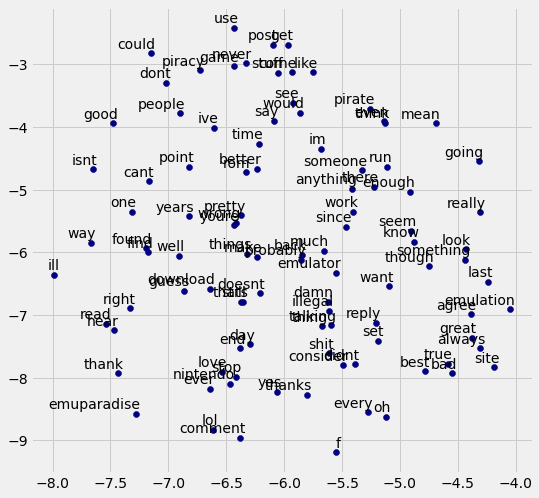

In [54]:
# import the t-SNE library and matplotlib for plotting  
from sklearn.manifold import TSNE  
import matplotlib.pyplot as plt  
  
# define the function to compute the dimensionality reduction  
# and then produce the biplot  
def tsne_plot(model):  
    "Creates a TSNE model and plots it"  
    labels = []  
    tokens = []  

    for word in model.wv.vocab:  
        tokens.append(model.wv[word])  
        labels.append(word)  

    tsne_model = TSNE(perplexity=35, n_components=2, init='pca', n_iter=2500, angle=0.99)  
    new_values = tsne_model.fit_transform(tokens)  

    x = []  
    y = []  
    for value in new_values:  
        x.append(value[0])  
        y.append(value[1])  

    plt.figure(figsize=(8, 8))   
    for i in range(len(x)):  
        plt.scatter(x[i],y[i],c='navy')  
        plt.annotate(labels[i],  
                    xy=(x[i], y[i]),  
                    xytext=(5, 2),  
                    textcoords='offset points',  
                    ha='right',  
                    va='bottom')  
    plt.show()  
  
#call the function on our dataset  
tsne_plot(model)  

### Tópico 1

In [55]:
df_one = df[df['topic'] == 1.0]

df_one.sort_values('topic_contrib', ascending=False)

,id_sub,id_comm,score,tree_order,body,tk_body,keywords,topic,topic_contrib
2448,5cudku,da31vqh,1,0,yes drives my wife nuts because of all of the...,"['yes', 'drive', 'wife', 'nut', 'cartscds', 'a...","game, would, play, make, people, use, rom, buy...",1.0,0.9729
2769,8540qt,dvuywn7,4,0,thats a stupid law i understand dont download ...,"['thats', 'stupid', 'law', 'understand', 'dont...","game, would, play, make, people, use, rom, buy...",1.0,0.9692
2717,8540qt,dvut3ky,21,0,in this case emulation is less illegal than us...,"['case', 'emulation', 'le', 'illegal', 'use', ...","game, would, play, make, people, use, rom, buy...",1.0,0.9692
3095,ajfwe3,eevxdn8,2,0,thats not how fair use works lolfair use is a ...,"['thats', 'fair', 'use', 'works', 'lolfair', '...","game, would, play, make, people, use, rom, buy...",1.0,0.9681
1789,4uznwc,d5wbupy,1,0,ah yes i am aware of all of that i just said t...,"['ah', 'yes', 'aware', 'say', 'nintendo', 'sel...","game, would, play, make, people, use, rom, buy...",1.0,0.9649
...,...,...,...,...,...,...,...,...,...
2253,bcvxur,ektzl5q,1,0,no one would dispute that the problem is youre...,"['one', 'would', 'dispute', 'problem', 'youre'...","game, would, play, make, people, use, rom, buy...",1.0,0.3578
776,95l6p0,e3uf9ys,2,0,fwiw random suggestions youve probably alread...,"['fwiw', 'random', 'suggestion', 'youve', 'pro...","game, would, play, make, people, use, rom, buy...",1.0,0.3520
1176,4ibsl4,d32phph,7,0,thanks but probably not everyone wants me to w...,"['thanks', 'probably', 'everyone', 'want', 'wr...","game, would, play, make, people, use, rom, buy...",1.0,0.3490
2738,8540qt,dvv44lt,3,0,simpsons hit and run has a windows version,"['simpson', 'hit', 'run', 'windows', 'version']","game, would, play, make, people, use, rom, buy...",1.0,0.3339


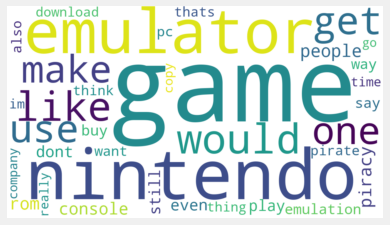

In [56]:
#CRIA WORDCLOUD

import re
import string

all_words = ''
all_words = ' '.join([tk_body for tk_body in df_one['tk_body']])
all_words = re.sub('[%s]' % re.escape(string.punctuation), '', all_words)
all_words

from nltk.corpus import stopwords
stop_words = stopwords.words('english')

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

word_cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=1280,
                  height=720,
                  max_words=35).generate(all_words)


plt.imshow(word_cloud, interpolation = 'bilinear')
plt.axis('off')
plt.savefig('topic1.png', dpi=300)
plt.show()

In [57]:
#FUNÇÃO QUE DEFINE SUBJETIVIDADE E POLARIDADE DAS SUBMISSIONS
from textblob import TextBlob
pd.options.mode.chained_assignment = None 

def get_subjectivity(text):
    text = str(text)
    return TextBlob(text).sentiment.subjectivity

def get_polarity(text):
    text = str(text)
    return TextBlob(text).sentiment.polarity

#CRIA COLUNAS DE SUBJ E POLAR NO DF
df_one['Subjectivity'] = df_one['body'].apply(get_subjectivity)
df_one['Polarity'] = df_one['body'].apply(get_polarity)

#MOSTRA RESULTADOS
df_one.head()

,id_sub,id_comm,score,tree_order,body,tk_body,keywords,topic,topic_contrib,Subjectivity,Polarity
1,95mcku,e3u0qv8,344,0,rip my favorite rom site time to get a hardriv...,"['rip', 'favorite', 'rom', 'site', 'time', 'ge...","game, would, play, make, people, use, rom, buy...",1.0,0.6823,1.000000,0.500000
2,95mcku,e3tz4ir,158,0,feels like part of my life is gone,"['feel', 'like', 'part', 'life', 'go']","game, would, play, make, people, use, rom, buy...",1.0,0.6606,0.000000,0.000000
3,95mcku,e3u2ypz,139,0,i wish there was some sort of law or rule that...,"['wish', 'sort', 'law', 'rule', 'would', 'allo...","game, would, play, make, people, use, rom, buy...",1.0,0.7960,0.370000,-0.030000
5,95mcku,e3tspn3,173,0,thats a real shame im glad they were able to s...,"['thats', 'real', 'shame', 'im', 'glad', 'able...","game, would, play, make, people, use, rom, buy...",1.0,0.8195,0.536458,0.232292
7,95mcku,e3v6313,74,0,i blame nintendo for not offering a better alt...,"['blame', 'nintendo', 'offering', 'better', 'a...","game, would, play, make, people, use, rom, buy...",1.0,0.5700,0.394444,0.172222


/home/lucasxavier/.local/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 0, 'Polaridade')

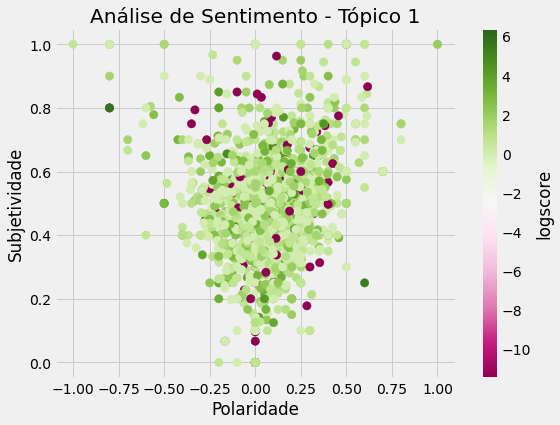

In [58]:
import numpy as np

epsilon = 1e-5   
df_one['logscore'] = np.log(df_one['score'] + epsilon)

zero_plot = df_one.plot.scatter(x='Polarity',
                     y='Subjectivity',
                     c='logscore',
                     colormap='PiYG',
                     title='Análise de Sentimento - Tópico 1',
                     s = 69,
                     figsize = (8,6))

zero_plot.set_ylabel('Subjetividade')
zero_plot.set_xlabel('Polaridade')

In [59]:
#LIMPRA CARACTÉRES INDESEJADOS, CITAÇÕES, CÓDIGOS DO REDDIT E OUTROS
import re
import string

df_one_clean_1 = pd.DataFrame(columns=['id_sub', 'id_comm', 'score','tree_order','body', 'keywords',
                                        'topic', 'topic_contrib', 'Subjectivity', 'Polarity'])

for row_index,row in df_one.iterrows():
    text = str(df_one['body'][row_index])
    split_text = text.splitlines()
    text2 = ''

    for index in split_text:
        if not index.startswith('>'):
            text2 += str(index)
    
    text2 = text2.lower()
    text2 = re.sub('\[.*?\]', '', text2)
    text2 = re.sub('\[.*?\]', '', text2)
    text2 = re.sub('[%s]' % re.escape(string.punctuation), '', text2)
    text2 = re.sub('\w*\d\w*', '', text2)
    text2 = re.sub('[‘’“”…]', '', text2)
    text2 = re.sub('\n', '', text2)
    
    df_one_clean_1.loc[row_index] = [df_one['id_sub'][row_index],
                                      df_one['id_comm'][row_index],
                                      df_one['score'][row_index],
                                      df_one['tree_order'][row_index],
                                      text2,
                                      df_one['keywords'][row_index],
                                      df_one['topic'][row_index],
                                      df_one['topic_contrib'][row_index],
                                      df_one['Subjectivity'][row_index],
                                      df_one['Polarity'][row_index]
                                     ]
    
df_one_clean_1.head()

,id_sub,id_comm,score,tree_order,body,keywords,topic,topic_contrib,Subjectivity,Polarity
1,95mcku,e3u0qv8,344,0,rip my favorite rom site time to get a hardriv...,"game, would, play, make, people, use, rom, buy...",1.0,0.6823,1.000000,0.500000
2,95mcku,e3tz4ir,158,0,feels like part of my life is gone,"game, would, play, make, people, use, rom, buy...",1.0,0.6606,0.000000,0.000000
3,95mcku,e3u2ypz,139,0,i wish there was some sort of law or rule that...,"game, would, play, make, people, use, rom, buy...",1.0,0.7960,0.370000,-0.030000
5,95mcku,e3tspn3,173,0,thats a real shame im glad they were able to s...,"game, would, play, make, people, use, rom, buy...",1.0,0.8195,0.536458,0.232292
7,95mcku,e3v6313,74,0,i blame nintendo for not offering a better alt...,"game, would, play, make, people, use, rom, buy...",1.0,0.5700,0.394444,0.172222


In [60]:
import nltk
from nltk import word_tokenize
from nltk.corpus import wordnet as wn

def get_lemma(word):
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
        return lemma
    
tokenized_list_of_sentences = []
list_of_sentences = []

df_one_clean_1['body'] = comments_df_clean_1['body'].astype(str)
df_one_clean_2 = pd.DataFrame(columns=['id_sub', 'id_comm', 'score','tree_order','body', 'tk_body', 'keywords',
                                        'topic', 'topic_contrib', 'Subjectivity', 'Polarity'])
en_stop = set(nltk.corpus.stopwords.words('english'))

for row_index,row in df_one_clean_1.iterrows():
    raw = df_one_clean_1['body'][row_index]
    tokens = nltk.word_tokenize(raw)
    tokens = [token for token in tokens if token not in en_stop]
    tokens = [get_lemma(token) for token in tokens]
    tokens = [token for token in tokens if not token.startswith("linkedhttp")]
    tokens = [token for token in tokens if not token == 'nan']
    
    tokenized_list_of_sentences.append(tokens)
    list_of_sentences.append(raw)
    
    df_one_clean_2.loc[row_index] = [df_one_clean_1['id_sub'][row_index],
                                      df_one_clean_1['id_comm'][row_index],
                                      df_one_clean_1['score'][row_index],
                                      df_one_clean_1['tree_order'][row_index],
                                      df_one_clean_1['body'][row_index],
                                      tokens,
                                      df_one_clean_1['keywords'][row_index],
                                      df_one_clean_1['topic'][row_index],
                                      df_one_clean_1['topic_contrib'][row_index],
                                      df_one_clean_1['Subjectivity'][row_index],
                                      df_one_clean_1['Polarity'][row_index]
                                     ]
    
df_one_clean_2.head()

,id_sub,id_comm,score,tree_order,body,tk_body,keywords,topic,topic_contrib,Subjectivity,Polarity
1,95mcku,e3u0qv8,344,0,rip my favorite rom site time to get a hardriv...,"[rip, favorite, rom, site, time, get, hardrive...","game, would, play, make, people, use, rom, buy...",1.0,0.6823,1.000000,0.500000
2,95mcku,e3tz4ir,158,0,feels like part of my life is gone,"[feel, like, part, life, go]","game, would, play, make, people, use, rom, buy...",1.0,0.6606,0.000000,0.000000
3,95mcku,e3u2ypz,139,0,i wish there was some sort of law or rule that...,"[wish, sort, law, rule, would, allow, video, g...","game, would, play, make, people, use, rom, buy...",1.0,0.7960,0.370000,-0.030000
5,95mcku,e3tspn3,173,0,thats a real shame im glad they were able to s...,"[thats, real, shame, im, glad, able, stay, aro...","game, would, play, make, people, use, rom, buy...",1.0,0.8195,0.536458,0.232292
7,95mcku,e3v6313,74,0,i blame nintendo for not offering a better alt...,"[blame, nintendo, offering, better, alternativ...","game, would, play, make, people, use, rom, buy...",1.0,0.5700,0.394444,0.172222


In [61]:
all_token_one = []

for row_index,row in df_one_clean_2.iterrows():
    all_token_one.append(df_one_clean_2['tk_body'][row_index])

In [62]:
from gensim.models import  Word2Vec, KeyedVectors

model = Word2Vec(all_token_one, window=10, min_count=5, size=128)

print('Words most similar to emulate')
print(*model.wv.most_similar('emulate'), sep = "\n")
print('-------------------------------')
print('Words most similar to emulation')
print(*model.wv.most_similar('emulation'), sep = "\n")
print('-------------------------------')
print('Words most similar to emulator')
print(*model.wv.most_similar('emulator'), sep = "\n")
print('-------------------------------')
print('Words most similar to piracy')
print(*model.wv.most_similar('piracy'), sep = "\n")
print('-------------------------------')
print('Words most similar to pirate')
print(*model.wv.most_similar('pirate'), sep = "\n")
print('-------------------------------')
print('Words most similar to legal')
print(*model.wv.most_similar('legal'), sep = "\n")
print('-------------------------------')
print('Words most similar to illegal')
print(*model.wv.most_similar('illegal'), sep = "\n")
print('-------------------------------')
print('Words most similar to rom')
print(*model.wv.most_similar('rom'), sep = "\n")
print('-------------------------------')
print('Words most similar to right')
print(*model.wv.most_similar('right'), sep = "\n")
print('-------------------------------')
print('Words most similar to wrong')
print(*model.wv.most_similar('wrong'), sep = "\n")

Words most similar to emulate
('system', 0.9999356269836426)
('available', 0.9999315738677979)
('new', 0.999929666519165)
('however', 0.9999285340309143)
('title', 0.9999281167984009)
('could', 0.9999274611473083)
('release', 0.9999268054962158)
('every', 0.9999264478683472)
('price', 0.9999263882637024)
('well', 0.9999256730079651)
-------------------------------
Words most similar to emulation
('part', 0.9999476671218872)
('without', 0.9999458193778992)
('via', 0.9999444484710693)
('well', 0.9999430775642395)
('become', 0.9999427795410156)
('example', 0.9999419450759888)
('actually', 0.9999406337738037)
('since', 0.9999403953552246)
('reason', 0.9999384880065918)
('even', 0.9999377727508545)
-------------------------------
Words most similar to emulator
('might', 0.9999318718910217)
('using', 0.9999299049377441)
('access', 0.9999275207519531)
('use', 0.9999262094497681)
('software', 0.9999254941940308)
('due', 0.999925434589386)
('there', 0.999925434589386)
('getting', 0.999925017356

In [63]:
from gensim.models import  Word2Vec, KeyedVectors

model = Word2Vec(all_token_one, window=10, min_count=15, size=256, workers=4)

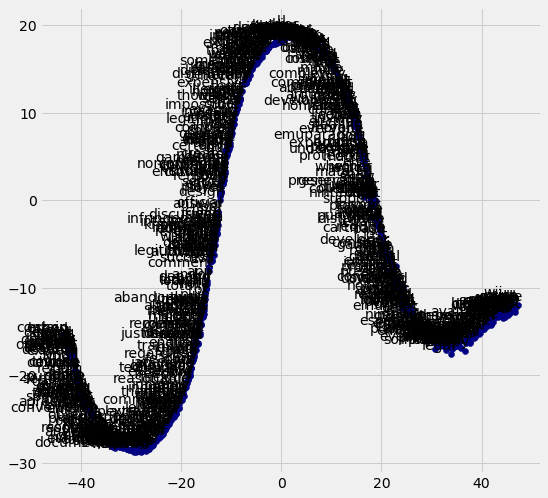

In [64]:
# import the t-SNE library and matplotlib for plotting  
from sklearn.manifold import TSNE  
import matplotlib.pyplot as plt  
  
# define the function to compute the dimensionality reduction  
# and then produce the biplot  
def tsne_plot(model):  
    "Creates a TSNE model and plots it"  
    labels = []  
    tokens = []  

    for word in model.wv.vocab:  
        tokens.append(model.wv[word])  
        labels.append(word)  

    tsne_model = TSNE(perplexity=35, n_components=2, init='pca', n_iter=2500, angle=0.99)  
    new_values = tsne_model.fit_transform(tokens)  

    x = []  
    y = []  
    for value in new_values:  
        x.append(value[0])  
        y.append(value[1])  

    plt.figure(figsize=(8, 8))   
    for i in range(len(x)):  
        plt.scatter(x[i],y[i],c='navy')  
        plt.annotate(labels[i],  
                    xy=(x[i], y[i]),  
                    xytext=(5, 2),  
                    textcoords='offset points',  
                    ha='right',  
                    va='bottom')  
    plt.show()  
  
#call the function on our dataset  
tsne_plot(model)  

In [90]:
from gensim.models import  Word2Vec, KeyedVectors

model = Word2Vec(all_token_one, window=10, min_count=50, size=256, workers=4)

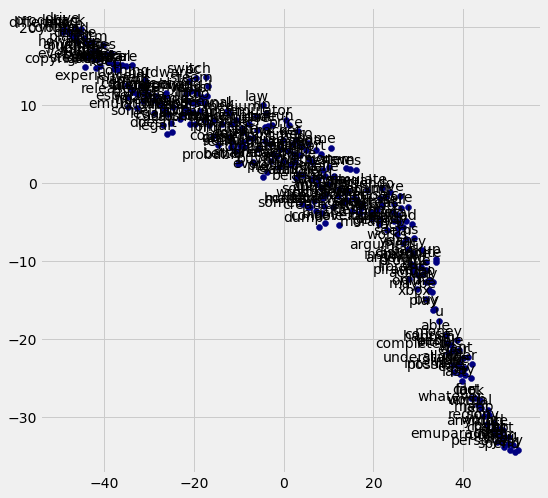

In [91]:
# import the t-SNE library and matplotlib for plotting  
from sklearn.manifold import TSNE  
import matplotlib.pyplot as plt  
  
# define the function to compute the dimensionality reduction  
# and then produce the biplot  
def tsne_plot(model):  
    "Creates a TSNE model and plots it"  
    labels = []  
    tokens = []  

    for word in model.wv.vocab:  
        tokens.append(model.wv[word])  
        labels.append(word)  

    tsne_model = TSNE(perplexity=15, n_components=2, init='pca', n_iter=2500, angle=0.99)  
    new_values = tsne_model.fit_transform(tokens)  

    x = []  
    y = []  
    for value in new_values:  
        x.append(value[0])  
        y.append(value[1])  

    plt.figure(figsize=(8, 8))   
    for i in range(len(x)):  
        plt.scatter(x[i],y[i],c='navy')  
        plt.annotate(labels[i],  
                    xy=(x[i], y[i]),  
                    xytext=(5, 2),  
                    textcoords='offset points',  
                    ha='right',  
                    va='bottom')  
    plt.show()  
  
#call the function on our dataset  
tsne_plot(model)  

### Tópico 2

In [67]:
df_two = df[df['topic'] == 2.0]

df_two.sort_values('topic_contrib', ascending=False)

,id_sub,id_comm,score,tree_order,body,tk_body,keywords,topic,topic_contrib
1611,2pmgzm,cmyj88v,5,0,here is the httpwwwredditcomrpcmasterracewikie...,['httpwwwredditcomrpcmasterracewikiemulatorgui...,"take, think, need, try, site, keep, bit, link,...",2.0,0.9086
750,95l6p0,e3u1atl,13,0,this is terrible there are other sites but non...,"['terrible', 'site', 'none', 'amaze', 'psxtops...","take, think, need, try, site, keep, bit, link,...",2.0,0.9084
386,95mcku,e3uz4uc,7,0,unironically writes microoft and ony and expe...,"['unironically', 'write', 'microoft', 'ony', '...","take, think, need, try, site, keep, bit, link,...",2.0,0.9020
787,95l6p0,e3u6olx,1,0,sleep tight sweet prince angels carry you unto...,"['sleep', 'tight', 'sweet', 'prince', 'angel',...","take, think, need, try, site, keep, bit, link,...",2.0,0.8993
2906,9aqvq2,e4xgtyf,26,0,hypocrites hippocrates was an ancient greek au...,"['hypocrite', 'hippocrates', 'ancient', 'greek...","take, think, need, try, site, keep, bit, link,...",2.0,0.8877
...,...,...,...,...,...,...,...,...,...
3178,9yx6g3,ea52deh,-5,0,nobody got rich with that you have to spend so...,"['nobody', 'get', 'rich', 'spend', 'money', 'h...","take, think, need, try, site, keep, bit, link,...",2.0,0.3552
32,95mcku,e3uu9sh,8,0,emuparadise was always my go to site for roms ...,"['emuparadise', 'always', 'go', 'site', 'rom',...","take, think, need, try, site, keep, bit, link,...",2.0,0.3538
1161,4ibsl4,d2x4xvl,20,0,can this be likened to appreciating a photogra...,"['liken', 'appreciate', 'photograph', 'paintin...","take, think, need, try, site, keep, bit, link,...",2.0,0.3524
232,95mcku,e3urfr1,19,0,you should put it up somewhere and share with ...,"['put', 'somewhere', 'share', 'everyone']","take, think, need, try, site, keep, bit, link,...",2.0,0.3388


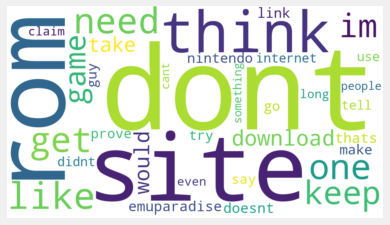

In [68]:
#CRIA WORDCLOUD

import re
import string

all_words = ''
all_words = ' '.join([tk_body for tk_body in df_two['tk_body']])
all_words = re.sub('[%s]' % re.escape(string.punctuation), '', all_words)
all_words

from nltk.corpus import stopwords
stop_words = stopwords.words('english')

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

word_cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=1280,
                  height=720,
                  max_words=35).generate(all_words)


plt.imshow(word_cloud, interpolation = 'bilinear')
plt.axis('off')
plt.savefig('topic2.png', dpi=300)
plt.show()

In [69]:
#FUNÇÃO QUE DEFINE SUBJETIVIDADE E POLARIDADE DAS SUBMISSIONS
from textblob import TextBlob
pd.options.mode.chained_assignment = None 

def get_subjectivity(text):
    text = str(text)
    return TextBlob(text).sentiment.subjectivity

def get_polarity(text):
    text = str(text)
    return TextBlob(text).sentiment.polarity

#CRIA COLUNAS DE SUBJ E POLAR NO DF
df_two['Subjectivity'] = df_two['body'].apply(get_subjectivity)
df_two['Polarity'] = df_two['body'].apply(get_polarity)

#MOSTRA RESULTADOS
df_two.head()

,id_sub,id_comm,score,tree_order,body,tk_body,keywords,topic,topic_contrib,Subjectivity,Polarity
0,95mcku,e3ugdsv,1,0,given that in light of this its no longer a ro...,"['given', 'light', 'longer', 'rom', 'site', 'l...","take, think, need, try, site, keep, bit, link,...",2.0,0.4522,0.550000,0.069792
6,95mcku,e3u6o4t,150,0,i cant be the only one who went to his fridge ...,"['cant', 'one', 'go', 'fridge', 'pour', 'beer'...","take, think, need, try, site, keep, bit, link,...",2.0,0.5192,1.000000,-0.250000
15,95mcku,e3u9iz5,83,0,so far i havent seen anyone address the elepha...,"['far', 'havent', 'see', 'anyone', 'address', ...","take, think, need, try, site, keep, bit, link,...",2.0,0.4880,0.557969,0.189675
16,95mcku,e3tu5mj,46,0,shame they were pretty nice guys i mentioned a...,"['shame', 'pretty', 'nice', 'guy', 'mention', ...","take, think, need, try, site, keep, bit, link,...",2.0,0.6047,0.745000,0.200000
32,95mcku,e3uu9sh,8,0,emuparadise was always my go to site for roms ...,"['emuparadise', 'always', 'go', 'site', 'rom',...","take, think, need, try, site, keep, bit, link,...",2.0,0.3538,0.850000,0.266667


/home/lucasxavier/.local/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 0, 'Polaridade')

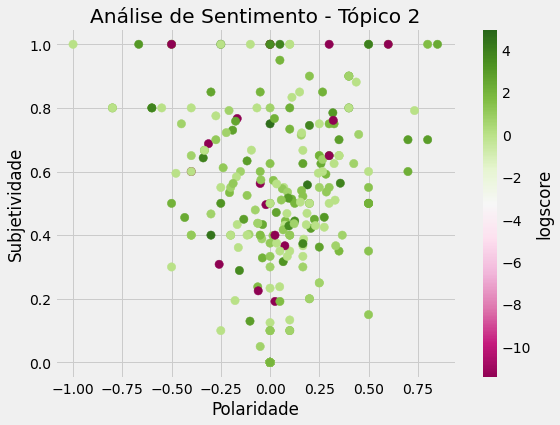

In [70]:
import numpy as np

epsilon = 1e-5   
df_two['logscore'] = np.log(df_two['score'] + epsilon)

zero_plot = df_two.plot.scatter(x='Polarity',
                     y='Subjectivity',
                     c='logscore',
                     colormap='PiYG',
                     title='Análise de Sentimento - Tópico 2',
                     s = 69,
                     figsize = (8,6))

zero_plot.set_ylabel('Subjetividade')
zero_plot.set_xlabel('Polaridade')

In [71]:
#LIMPRA CARACTÉRES INDESEJADOS, CITAÇÕES, CÓDIGOS DO REDDIT E OUTROS
import re
import string

df_two_clean_1 = pd.DataFrame(columns=['id_sub', 'id_comm', 'score','tree_order','body', 'keywords',
                                        'topic', 'topic_contrib', 'Subjectivity', 'Polarity'])

for row_index,row in df_two.iterrows():
    text = str(df_two['body'][row_index])
    split_text = text.splitlines()
    text2 = ''

    for index in split_text:
        if not index.startswith('>'):
            text2 += str(index)
    
    text2 = text2.lower()
    text2 = re.sub('\[.*?\]', '', text2)
    text2 = re.sub('\[.*?\]', '', text2)
    text2 = re.sub('[%s]' % re.escape(string.punctuation), '', text2)
    text2 = re.sub('\w*\d\w*', '', text2)
    text2 = re.sub('[‘’“”…]', '', text2)
    text2 = re.sub('\n', '', text2)
    
    df_two_clean_1.loc[row_index] = [df_two['id_sub'][row_index],
                                      df_two['id_comm'][row_index],
                                      df_two['score'][row_index],
                                      df_two['tree_order'][row_index],
                                      text2,
                                      df_two['keywords'][row_index],
                                      df_two['topic'][row_index],
                                      df_two['topic_contrib'][row_index],
                                      df_two['Subjectivity'][row_index],
                                      df_two['Polarity'][row_index]
                                     ]
    
df_two_clean_1.head()

,id_sub,id_comm,score,tree_order,body,keywords,topic,topic_contrib,Subjectivity,Polarity
0,95mcku,e3ugdsv,1,0,given that in light of this its no longer a ro...,"take, think, need, try, site, keep, bit, link,...",2.0,0.4522,0.550000,0.069792
6,95mcku,e3u6o4t,150,0,i cant be the only one who went to his fridge ...,"take, think, need, try, site, keep, bit, link,...",2.0,0.5192,1.000000,-0.250000
15,95mcku,e3u9iz5,83,0,so far i havent seen anyone address the elepha...,"take, think, need, try, site, keep, bit, link,...",2.0,0.4880,0.557969,0.189675
16,95mcku,e3tu5mj,46,0,shame they were pretty nice guys i mentioned a...,"take, think, need, try, site, keep, bit, link,...",2.0,0.6047,0.745000,0.200000
32,95mcku,e3uu9sh,8,0,emuparadise was always my go to site for roms ...,"take, think, need, try, site, keep, bit, link,...",2.0,0.3538,0.850000,0.266667


In [72]:
import nltk
from nltk import word_tokenize
from nltk.corpus import wordnet as wn

def get_lemma(word):
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
        return lemma
    
tokenized_list_of_sentences = []
list_of_sentences = []

df_two_clean_1['body'] = comments_df_clean_1['body'].astype(str)
df_two_clean_2 = pd.DataFrame(columns=['id_sub', 'id_comm', 'score','tree_order','body', 'tk_body', 'keywords',
                                        'topic', 'topic_contrib', 'Subjectivity', 'Polarity'])
en_stop = set(nltk.corpus.stopwords.words('english'))

for row_index,row in df_two_clean_1.iterrows():
    raw = df_two_clean_1['body'][row_index]
    tokens = nltk.word_tokenize(raw)
    tokens = [token for token in tokens if token not in en_stop]
    tokens = [get_lemma(token) for token in tokens]
    tokens = [token for token in tokens if not token.startswith("linkedhttp")]
    tokens = [token for token in tokens if not token == 'nan']
    
    tokenized_list_of_sentences.append(tokens)
    list_of_sentences.append(raw)
    
    df_two_clean_2.loc[row_index] = [df_two_clean_1['id_sub'][row_index],
                                      df_two_clean_1['id_comm'][row_index],
                                      df_two_clean_1['score'][row_index],
                                      df_two_clean_1['tree_order'][row_index],
                                      df_two_clean_1['body'][row_index],
                                      tokens,
                                      df_two_clean_1['keywords'][row_index],
                                      df_two_clean_1['topic'][row_index],
                                      df_two_clean_1['topic_contrib'][row_index],
                                      df_two_clean_1['Subjectivity'][row_index],
                                      df_two_clean_1['Polarity'][row_index]
                                     ]
    
df_two_clean_2.head()

,id_sub,id_comm,score,tree_order,body,tk_body,keywords,topic,topic_contrib,Subjectivity,Polarity
0,95mcku,e3ugdsv,1,0,given that in light of this its no longer a ro...,"[given, light, longer, rom, site, long, major,...","take, think, need, try, site, keep, bit, link,...",2.0,0.4522,0.550000,0.069792
6,95mcku,e3u6o4t,150,0,i cant be the only one who went to his fridge ...,"[cant, one, go, fridge, pour, beer, emuparadis...","take, think, need, try, site, keep, bit, link,...",2.0,0.5192,1.000000,-0.250000
15,95mcku,e3u9iz5,83,0,so far i havent seen anyone address the elepha...,"[far, havent, see, anyone, address, elephant, ...","take, think, need, try, site, keep, bit, link,...",2.0,0.4880,0.557969,0.189675
16,95mcku,e3tu5mj,46,0,shame they were pretty nice guys i mentioned a...,"[shame, pretty, nice, guy, mention, malicious,...","take, think, need, try, site, keep, bit, link,...",2.0,0.6047,0.745000,0.200000
32,95mcku,e3uu9sh,8,0,emuparadise was always my go to site for roms ...,"[emuparadise, always, go, site, rom, wasnt, sk...","take, think, need, try, site, keep, bit, link,...",2.0,0.3538,0.850000,0.266667


In [73]:
all_token_two = []

for row_index,row in df_two_clean_2.iterrows():
    all_token_two.append(df_two_clean_2['tk_body'][row_index])

In [74]:
from gensim.models import  Word2Vec, KeyedVectors

model = Word2Vec(all_token_two, window=10, min_count=5, size=128)

print('Words most similar to emulation')
print(*model.wv.most_similar('emulation'), sep = "\n")
print('-------------------------------')
print('Words most similar to emulator')
print(*model.wv.most_similar('emulator'), sep = "\n")
print('-------------------------------')
print('Words most similar to piracy')
print(*model.wv.most_similar('piracy'), sep = "\n")
print('-------------------------------')
print('Words most similar to pirate')
print(*model.wv.most_similar('pirate'), sep = "\n")
print('-------------------------------')
print('Words most similar to rom')
print(*model.wv.most_similar('rom'), sep = "\n")
print('-------------------------------')
print('Words most similar to right')
print(*model.wv.most_similar('right'), sep = "\n")

Words most similar to emulation
('sad', 0.25529199838638306)
('company', 0.24568557739257812)
('still', 0.19362330436706543)
('reddit', 0.18720713257789612)
('cool', 0.17592571675777435)
('host', 0.1755264848470688)
('proof', 0.16561086475849152)
('expect', 0.16416135430335999)
('copy', 0.1618826985359192)
('without', 0.15664340555667877)
-------------------------------
Words most similar to emulator
('tell', 0.20662921667099)
('dont', 0.20337074995040894)
('virus', 0.18726234138011932)
('maybe', 0.1837332844734192)
('full', 0.1832076758146286)
('there', 0.1822984218597412)
('wasnt', 0.18089014291763306)
('ne', 0.17526964843273163)
('piracy', 0.168483167886734)
('since', 0.1663791537284851)
-------------------------------
Words most similar to piracy
('first', 0.27493223547935486)
('question', 0.17596980929374695)
('emulator', 0.16848313808441162)
('game', 0.15197725594043732)
('lol', 0.1497575342655182)
('sorry', 0.1441437155008316)
('archive', 0.13909904658794403)
('far', 0.132559567

In [75]:
from gensim.models import  Word2Vec, KeyedVectors

model = Word2Vec(all_token_two, window=10, min_count=15, size=256, workers=4)

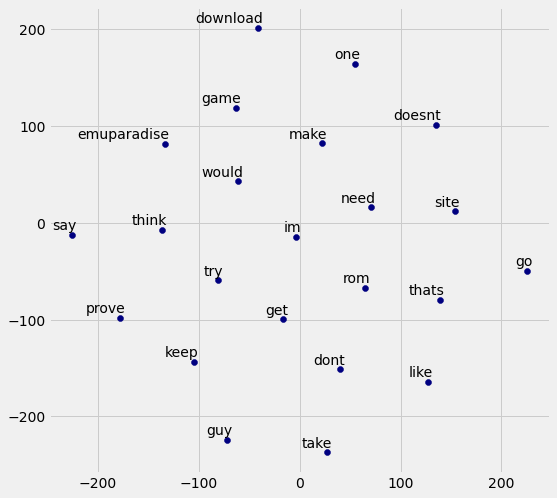

In [76]:
# import the t-SNE library and matplotlib for plotting  
from sklearn.manifold import TSNE  
import matplotlib.pyplot as plt  
  
# define the function to compute the dimensionality reduction  
# and then produce the biplot  
def tsne_plot(model):  
    "Creates a TSNE model and plots it"  
    labels = []  
    tokens = []  

    for word in model.wv.vocab:  
        tokens.append(model.wv[word])  
        labels.append(word)  

    tsne_model = TSNE(perplexity=35, n_components=2, init='pca', n_iter=2500, angle=0.99)  
    new_values = tsne_model.fit_transform(tokens)  

    x = []  
    y = []  
    for value in new_values:  
        x.append(value[0])  
        y.append(value[1])  

    plt.figure(figsize=(8, 8))   
    for i in range(len(x)):  
        plt.scatter(x[i],y[i],c='navy')  
        plt.annotate(labels[i],  
                    xy=(x[i], y[i]),  
                    xytext=(5, 2),  
                    textcoords='offset points',  
                    ha='right',  
                    va='bottom')  
    plt.show()  
  
#call the function on our dataset  
tsne_plot(model)

In [77]:
from gensim.models import  Word2Vec, KeyedVectors

model = Word2Vec(all_token_two, window=10, min_count=7, size=256, workers=4)

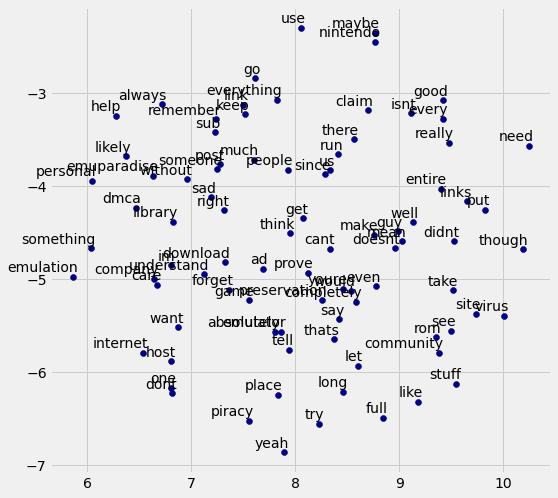

In [78]:
# import the t-SNE library and matplotlib for plotting  
from sklearn.manifold import TSNE  
import matplotlib.pyplot as plt  
  
# define the function to compute the dimensionality reduction  
# and then produce the biplot  
def tsne_plot(model):  
    "Creates a TSNE model and plots it"  
    labels = []  
    tokens = []  

    for word in model.wv.vocab:  
        tokens.append(model.wv[word])  
        labels.append(word)  

    tsne_model = TSNE(perplexity=35, n_components=2, init='pca', n_iter=2500, angle=0.99)  
    new_values = tsne_model.fit_transform(tokens)  

    x = []  
    y = []  
    for value in new_values:  
        x.append(value[0])  
        y.append(value[1])  

    plt.figure(figsize=(8, 8))   
    for i in range(len(x)):  
        plt.scatter(x[i],y[i],c='navy')  
        plt.annotate(labels[i],  
                    xy=(x[i], y[i]),  
                    xytext=(5, 2),  
                    textcoords='offset points',  
                    ha='right',  
                    va='bottom')  
    plt.show()  
  
#call the function on our dataset  
tsne_plot(model)

## Fontes:

#### __[Topic modeling visualization – How to present the results of LDA models?](https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/)__ por Selva Prabhakaran 
#### __[Topic Modeling with Gensim (Python)](https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/)__ por Selva Prabhakaran 
#### __[PRAW: The Python Reddit API Wrapper](https://praw.readthedocs.io/en/latest/)__ por Bryce Boe
#### __[How to Do Sentiment Analysis on a Twitter Account](https://medium.com/better-programming/twitter-sentiment-analysis-15d8892c0082)__ por randerson112358
#### __[Word2Vec Model](https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html)__ por Gensim
#### __[Using word2vec to analyze word relationships in Python](https://methodmatters.github.io/using-word2vec-to-analyze-word/)__ por Method Matters Blog
#### __[Visualization of Multidimensional Datasets Using t-SNE in Python](https://pyshark.com/visualization-of-multidimensional-datasets-using-t-sne-in-python/)__ por Misha (PyShark)

## MIT License

#### Copyright (c) 2020 Lucas Busani Xavier

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.